In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Prakasam']
df.head()

Unnamed: 0  Latitude  Longitude  District    Mandal     Village  \
2556        2559     15.49       79.5  Prakasam  Kanigiri  Baduguleru   
2557        2560     15.49       79.5  Prakasam  Kanigiri  Baduguleru   
2558        2561     15.49       79.5  Prakasam  Kanigiri  Baduguleru   
2559        2562     15.49       79.5  Prakasam  Kanigiri  Baduguleru   
2560        2563     15.49       79.5  Prakasam  Kanigiri  Baduguleru   

     SoilType    pH    EC    OC  ...     B     Fe    Cu     Mn      NDVI  \
2556      Red  8.31  0.11  0.20  ...  0.63   1.96  0.62   8.60  0.011788   
2557      Red  6.65  0.08  0.12  ...  0.52  15.92  0.60   2.48  0.011788   
2558      Red  6.74  0.05  0.13  ...  0.46  10.92  0.66  15.36  0.011788   
2559      Red  6.31  0.03  0.16  ...  0.44   7.72  0.62  16.22  0.011788   
2560      Red  8.60  0.09  0.09  ...  0.49   0.92  0.28   4.76  0.011788   

         ARVI       EVI       GCI      NDWI    Crop  
2556  0.01074  0.111391  0.048773 -0.023806  Cotton  
2557  0.01074  0.111391  0.048773 -0.023806  Cotton  
2558  0.01074  0.111391  0.048773 -0.023806  Cotton  
2559  0.01074  0.111391  0.048773 -0.023806  Cotton  
2560  0.01074  0.111391  0.048773 -0.023806  Cotton  

[5 rows x 26 columns]

In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'EVI', 'GCI', 'NDVI'], axis = 1)
df.describe()

pH          EC          OC           P            K  \
count  485.000000  485.000000  485.000000  485.000000   485.000000   
mean     7.689732    0.334247    0.367505   12.356082   201.072165   
std      1.100884    1.313235    0.275873   10.092348   172.494236   
min      4.650000    0.010000    0.010000    1.030000    22.000000   
25%      6.800000    0.070000    0.160000    5.500000    99.000000   
50%      8.180000    0.140000    0.310000    9.470000   148.000000   
75%      8.520000    0.260000    0.490000   16.380000   235.000000   
max      9.600000   25.200000    1.940000   83.720000  1529.000000   

                Ca           Mg            S          Zn           B  \
count   485.000000   485.000000   485.000000  485.000000  485.000000   
mean   1851.701031   413.552577    18.865711    0.530144    1.198804   
std    1443.287141   372.891704    58.008623    0.570159    1.293075   
min      67.000000    17.000000     0.850000    0.030000    0.100000   
25%     485.000000   118.000000     2.670000    0.270000    0.400000   
50%    1776.000000   296.000000     5.040000    0.380000    0.770000   
75%    2846.000000   610.000000    13.970000    0.590000    1.510000   
max    6745.000000  2017.000000  1015.650000    8.790000   11.850000   

               Fe          Cu          Mn        NDWI  
count  485.000000  485.000000  485.000000  485.000000  
mean    10.746969    1.190186   11.690330   -0.030912  
std     10.337956    0.691945    5.422488    0.039201  
min      0.040000    0.060000    0.010000   -0.311160  
25%      3.840000    0.670000    8.100000   -0.025955  
50%      6.650000    1.040000   10.770000   -0.025359  
75%     14.860000    1.580000   14.040000   -0.023857  
max     73.160000    4.510000   39.840000    0.061869

In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Red', 'Black', 'Paddy'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace('Black', 'Black Soil')
df['SoilType'] = df['SoilType'].replace('Red', 'Red Soil')
df = df[df['SoilType'] != 'Paddy']
df.SoilType.unique()

array(['Red Soil', 'Black Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Red Soil': 402, 'Black Soil': 82}

<BarContainer object of 2 artists>

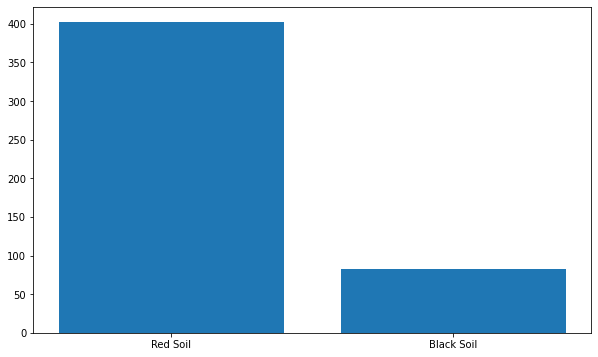

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Cotton', 'Cowpea', 'Paddy', 'Pigeonpea', 'Green gram', 'Cow pea',
       'Tobacco', 'Maize', 'Blackgram', 'Chilli', 'Prawns', 'chickpea'],
      dtype=object)

In [14]:
df['Crop'].value_counts()

Cowpea        201
Cotton         87
Paddy          82
Pigeonpea      45
Tobacco        33
Blackgram      11
Maize          10
chickpea        5
Prawns          3
Green gram      3
Cow pea         2
Chilli          2
Name: Crop, dtype: int64

CowPea    203
Cotton     87
Paddy      82
Name: Crop, dtype: int64


<BarContainer object of 3 artists>

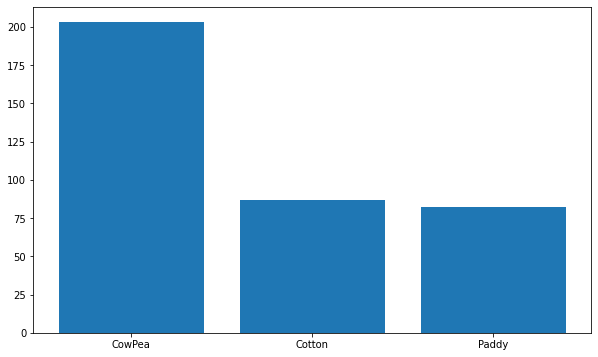

In [15]:
df['Crop'] = df['Crop'].replace('Pigeonpea', 'PigeonPea')
df['Crop'] = df['Crop'].replace(['Cow pea', 'Cowpea'], 'CowPea')
df = df[(df['Crop'] != 'Prawns') & (df['Crop'] != 'Chilli') & (df['Crop'] != 'Green gram') & (df['Crop'] != 'chickpea') & (df['Crop'] != 'Maize') & (df['Crop'] != 'Blackgram') & (df['Crop'] != 'Tobacco') & (df['Crop'] != 'PigeonPea')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

pH        EC        OC         P         K        Ca        Mg  \
pH    1.000000  0.225520  0.627646  0.145641  0.349761  0.710387  0.644894   
EC    0.225520  1.000000  0.180770  0.106842  0.269661  0.134513  0.266220   
OC    0.627646  0.180770  1.000000  0.347283  0.473994  0.553400  0.684945   
P     0.145641  0.106842  0.347283  1.000000  0.496825  0.023922  0.320879   
K     0.349761  0.269661  0.473994  0.496825  1.000000  0.147653  0.296714   
Ca    0.710387  0.134513  0.553400  0.023922  0.147653  1.000000  0.659068   
Mg    0.644894  0.266220  0.684945  0.320879  0.296714  0.659068  1.000000   
S     0.306670  0.883446  0.280316  0.213843  0.273834  0.243673  0.468273   
Zn    0.121496  0.047044  0.255104  0.198732  0.129357  0.036824  0.143484   
B     0.562174  0.671055  0.634237  0.353209  0.456390  0.371171  0.647208   
Fe    0.048194  0.084508  0.276063  0.439109  0.101086  0.096660  0.458539   
Cu    0.365111  0.143672  0.522492  0.357966  0.301687  0.403835  0.718345   
Mn   -0.196076 -0.001015  0.112950  0.056772  0.089939  0.007595  0.050831   
NDWI -0.054247 -0.042823  0.022170  0.021660  0.053227 -0.024325  0.028746   

             S        Zn         B        Fe        Cu        Mn      NDWI  
pH    0.306670  0.121496  0.562174  0.048194  0.365111 -0.196076 -0.054247  
EC    0.883446  0.047044  0.671055  0.084508  0.143672 -0.001015 -0.042823  
OC    0.280316  0.255104  0.634237  0.276063  0.522492  0.112950  0.022170  
P     0.213843  0.198732  0.353209  0.439109  0.357966  0.056772  0.021660  
K     0.273834  0.129357  0.456390  0.101086  0.301687  0.089939  0.053227  
Ca    0.243673  0.036824  0.371171  0.096660  0.403835  0.007595 -0.024325  
Mg    0.468273  0.143484  0.647208  0.458539  0.718345  0.050831  0.028746  
S     1.000000  0.098609  0.752408  0.276360  0.336935  0.016358 -0.090128  
Zn    0.098609  1.000000  0.191370  0.127318  0.272886  0.083235 -0.067809  
B     0.752408  0.191370  1.000000  0.284794  0.454291 -0.028914  0.006120  
Fe    0.276360  0.127318  0.284794  1.000000  0.627625  0.255540 -0.232438  
Cu    0.336935  0.272886  0.454291  0.627625  1.000000  0.249151 -0.033014  
Mn    0.016358  0.083235 -0.028914  0.255540  0.249151  1.000000 -0.202106  
NDWI -0.090128 -0.067809  0.006120 -0.232438 -0.033014 -0.202106  1.000000

In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['OC', 'Ca', 'Mg', 'S', 'B', 'Cu']


In [19]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'P', 'K', 'Zn', 'Fe', 'Mn', 'NDWI', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC      P      K    Zn    Fe   Mn      NDWI  Black Soil  \
2556  8.31  0.11  10.71  118.0  0.76  1.96  8.6 -0.023806           0   

      Red Soil  
2556         1  
2556    Cotton
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc = StandardScaler()
X[:, 0:8] = sc.fit_transform(X[:, 0:8])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# SMOTE: Synthetic Minority Over-sampling Technique

In [24]:
# Separating the dependent and independent variables
df = df.drop(['SoilType'], axis=1)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [25]:
# Standardizing the independent variables using Feature Scaling
sc2 = StandardScaler()
X[:, :] = sc2.fit_transform(X[:, :])

In [26]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [27]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [28]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [29]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7450980392156863


In [30]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 70.59 %
Standard Deviation: 5.23 %


# Decision Tree Classifier

In [31]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [32]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [33]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7254901960784313


In [34]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 72.57 %
Standard Deviation: 5.71 %


# Random Forest Classifier

In [35]:
clf3_3 = RandomForestClassifier(random_state=0)
clf3_3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [36]:
y_test_pred = clf3_3.predict(X_test)
y_train_pred = clf3_3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [37]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7973856209150327


In [38]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3_3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 77.18 %
Standard Deviation: 4.48 %


In [39]:
# pickle.dump(clf3_3, open('Prakasam_model.pkl', 'wb'))
# pickle.dump(sc2, open('Prakasam_scaler.pkl', 'wb'))

# XGBoost

In [40]:
clf4_4 = HistGradientBoostingClassifier(random_state=0)
clf4_4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [41]:
y_test_pred = clf4_4.predict(X_test)
y_train_pred = clf4_4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [42]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7843137254901961


In [43]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4_4, X = X_train, y = y_train, cv = 10)

In [44]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 77.40 %
Standard Deviation: 4.58 %


In [45]:
# pickle.dump(clf4_4, open('Prakasam_model.pkl', 'wb'))
# pickle.dump(sc2, open('Prakasam_scaler.pkl', 'wb'))

# Multi-layer Perceptron Classifier

In [46]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [47]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [48]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.7368421052631579
Testing Accuracy:  0.6797385620915033


In [49]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 63.13 %
Standard Deviation: 6.43 %


# Catboost

In [50]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.8066987	total: 137ms	remaining: 13.6s
1:	learn: 0.7053729	total: 138ms	remaining: 6.76s
2:	learn: 0.6716613	total: 139ms	remaining: 4.48s
3:	learn: 0.6510114	total: 139ms	remaining: 3.34s
4:	learn: 0.6076801	total: 140ms	remaining: 2.66s
5:	learn: 0.5628763	total: 141ms	remaining: 2.2s
6:	learn: 0.5459419	total: 141ms	remaining: 1.88s
7:	learn: 0.5322429	total: 142ms	remaining: 1.63s
8:	learn: 0.5236464	total: 142ms	remaining: 1.44s
9:	learn: 0.5109619	total: 143ms	remaining: 1.29s
10:	learn: 0.5047915	total: 144ms	remaining: 1.16s
11:	learn: 0.4977230	total: 144ms	remaining: 1.06s
12:	learn: 0.4807819	total: 145ms	remaining: 971ms
13:	learn: 0.4755353	total: 146ms	remaining: 895ms
14:	learn: 0.4669924	total: 146ms	remaining: 830ms
15:	learn: 0.4614860	total: 147ms	remaining: 772ms
16:	learn: 0.4500303	total: 148ms	remaining: 722ms
17:	learn: 0.4490223	total: 148ms	remaining: 676ms
18:	learn: 0.4395476	total: 149ms	remaining: 636ms
19:	learn: 0.4231389	total: 150ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7373202393
bestIteration = 98

Training on fold [1/5]

bestTest = 0.6667380081
bestIteration = 99

Training on fold [2/5]

bestTest = 0.7173710565
bestIteration = 99

Training on fold [3/5]

bestTest = 0.6826318354
bestIteration = 99

Training on fold [4/5]

bestTest = 0.7218941665
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0798677	test: 1.0840139	best: 1.0840139 (0)	total: 1.52ms	remaining: 1.51s
1:	learn: 1.0618779	test: 1.0719916	best: 1.0719916 (1)	total: 2.66ms	remaining: 1.33s
2:	learn: 1.0452176	test: 1.0606244	best: 1.0606244 (2)	total: 3.67ms	remaining: 1.22s
3:	learn: 1.0273549	test: 1.0480159	best: 1.0480159 (3)	total: 4.64ms	remaining: 1.16s
4:	learn: 1.0102400	test: 1.0372077	best: 1.0372077 (4)	total: 5.62ms	remaining: 1.12s
5:	learn: 0.9918201	test: 1.0227385	best: 1.0227385 (5)	total: 6.6ms	remaining: 1.09s
6:	learn: 0.9774670	test: 1.0134060	best: 1.0134060 (6)	total: 7.58ms	remaining: 1.07s
7:	learn: 0.9629966	test: 1.0028928	best: 1.0028928 (7)	total: 8.55ms	remaining: 1.06s
8:	learn: 0.9485906	test: 0.9922150	best: 0.9922150 (8)	total: 9.53ms	remaining: 1.05s
9:	learn: 0.9363172	test: 0.9833710	best: 0.9833710 (9)	total: 10.5ms	remaining: 1.04s
10:	learn: 0.9243422	test: 0.9739411	best: 0.9739411 (10)	total: 11.5ms	remaining: 1.04s
11:	learn: 0.9120915	test: 0.9651530	best:

184:	learn: 0.4531343	test: 0.6800760	best: 0.6800760 (184)	total: 180ms	remaining: 793ms
185:	learn: 0.4525090	test: 0.6799505	best: 0.6799505 (185)	total: 182ms	remaining: 796ms
186:	learn: 0.4520712	test: 0.6794368	best: 0.6794368 (186)	total: 183ms	remaining: 796ms
187:	learn: 0.4512250	test: 0.6794265	best: 0.6794265 (187)	total: 184ms	remaining: 795ms
188:	learn: 0.4509786	test: 0.6796287	best: 0.6794265 (187)	total: 185ms	remaining: 795ms
189:	learn: 0.4504420	test: 0.6785551	best: 0.6785551 (189)	total: 187ms	remaining: 795ms
190:	learn: 0.4493554	test: 0.6783715	best: 0.6783715 (190)	total: 188ms	remaining: 797ms
191:	learn: 0.4488339	test: 0.6777631	best: 0.6777631 (191)	total: 189ms	remaining: 796ms
192:	learn: 0.4475530	test: 0.6768995	best: 0.6768995 (192)	total: 190ms	remaining: 795ms
193:	learn: 0.4463480	test: 0.6772099	best: 0.6768995 (192)	total: 191ms	remaining: 794ms
194:	learn: 0.4457442	test: 0.6774601	best: 0.6768995 (192)	total: 192ms	remaining: 793ms
195:	learn

323:	learn: 0.3555611	test: 0.6386924	best: 0.6383975 (321)	total: 346ms	remaining: 722ms
324:	learn: 0.3550622	test: 0.6387323	best: 0.6383975 (321)	total: 348ms	remaining: 723ms
325:	learn: 0.3539299	test: 0.6385070	best: 0.6383975 (321)	total: 349ms	remaining: 722ms
326:	learn: 0.3535931	test: 0.6381614	best: 0.6381614 (326)	total: 350ms	remaining: 721ms
327:	learn: 0.3530050	test: 0.6376495	best: 0.6376495 (327)	total: 351ms	remaining: 720ms
328:	learn: 0.3526679	test: 0.6369945	best: 0.6369945 (328)	total: 352ms	remaining: 719ms
329:	learn: 0.3522364	test: 0.6359406	best: 0.6359406 (329)	total: 354ms	remaining: 718ms
330:	learn: 0.3514870	test: 0.6358226	best: 0.6358226 (330)	total: 355ms	remaining: 717ms
331:	learn: 0.3508273	test: 0.6361618	best: 0.6358226 (330)	total: 356ms	remaining: 716ms
332:	learn: 0.3502209	test: 0.6353872	best: 0.6353872 (332)	total: 357ms	remaining: 716ms
333:	learn: 0.3496006	test: 0.6346504	best: 0.6346504 (333)	total: 359ms	remaining: 715ms
334:	learn

464:	learn: 0.2890055	test: 0.6152114	best: 0.6152114 (464)	total: 532ms	remaining: 612ms
465:	learn: 0.2887589	test: 0.6152270	best: 0.6152114 (464)	total: 533ms	remaining: 611ms
466:	learn: 0.2881471	test: 0.6157433	best: 0.6152114 (464)	total: 535ms	remaining: 611ms
467:	learn: 0.2876768	test: 0.6154474	best: 0.6152114 (464)	total: 537ms	remaining: 610ms
468:	learn: 0.2871195	test: 0.6154818	best: 0.6152114 (464)	total: 538ms	remaining: 609ms
469:	learn: 0.2866074	test: 0.6156194	best: 0.6152114 (464)	total: 539ms	remaining: 608ms
470:	learn: 0.2864442	test: 0.6156312	best: 0.6152114 (464)	total: 541ms	remaining: 608ms
471:	learn: 0.2863409	test: 0.6155543	best: 0.6152114 (464)	total: 543ms	remaining: 607ms
472:	learn: 0.2857361	test: 0.6157251	best: 0.6152114 (464)	total: 544ms	remaining: 606ms
473:	learn: 0.2854273	test: 0.6152074	best: 0.6152074 (473)	total: 546ms	remaining: 606ms
474:	learn: 0.2848973	test: 0.6149767	best: 0.6149767 (474)	total: 547ms	remaining: 605ms
475:	learn

592:	learn: 0.2432327	test: 0.6028724	best: 0.6027456 (591)	total: 698ms	remaining: 479ms
593:	learn: 0.2427678	test: 0.6025104	best: 0.6025104 (593)	total: 700ms	remaining: 478ms
594:	learn: 0.2423431	test: 0.6024738	best: 0.6024738 (594)	total: 702ms	remaining: 478ms
595:	learn: 0.2419292	test: 0.6026894	best: 0.6024738 (594)	total: 703ms	remaining: 477ms
596:	learn: 0.2417558	test: 0.6024876	best: 0.6024738 (594)	total: 704ms	remaining: 476ms
597:	learn: 0.2415586	test: 0.6025995	best: 0.6024738 (594)	total: 706ms	remaining: 475ms
598:	learn: 0.2412843	test: 0.6023297	best: 0.6023297 (598)	total: 707ms	remaining: 474ms
599:	learn: 0.2407979	test: 0.6024550	best: 0.6023297 (598)	total: 709ms	remaining: 473ms
600:	learn: 0.2403042	test: 0.6020442	best: 0.6020442 (600)	total: 710ms	remaining: 472ms
601:	learn: 0.2400924	test: 0.6018503	best: 0.6018503 (601)	total: 712ms	remaining: 470ms
602:	learn: 0.2397450	test: 0.6023657	best: 0.6018503 (601)	total: 713ms	remaining: 469ms
603:	learn

747:	learn: 0.2045910	test: 0.5921693	best: 0.5919616 (718)	total: 870ms	remaining: 293ms
748:	learn: 0.2044459	test: 0.5920819	best: 0.5919616 (718)	total: 871ms	remaining: 292ms
749:	learn: 0.2040853	test: 0.5918717	best: 0.5918717 (749)	total: 873ms	remaining: 291ms
750:	learn: 0.2039985	test: 0.5915459	best: 0.5915459 (750)	total: 875ms	remaining: 290ms
751:	learn: 0.2038878	test: 0.5915208	best: 0.5915208 (751)	total: 876ms	remaining: 289ms
752:	learn: 0.2037088	test: 0.5916725	best: 0.5915208 (751)	total: 877ms	remaining: 288ms
753:	learn: 0.2034847	test: 0.5913110	best: 0.5913110 (753)	total: 879ms	remaining: 287ms
754:	learn: 0.2032135	test: 0.5913094	best: 0.5913094 (754)	total: 880ms	remaining: 286ms
755:	learn: 0.2028833	test: 0.5912111	best: 0.5912111 (755)	total: 881ms	remaining: 284ms
756:	learn: 0.2025451	test: 0.5917924	best: 0.5912111 (755)	total: 883ms	remaining: 283ms
757:	learn: 0.2024388	test: 0.5918152	best: 0.5912111 (755)	total: 884ms	remaining: 282ms
758:	learn

922:	learn: 0.1715043	test: 0.5850429	best: 0.5850335 (909)	total: 1.05s	remaining: 87.6ms
923:	learn: 0.1713272	test: 0.5849859	best: 0.5849859 (923)	total: 1.05s	remaining: 86.5ms
924:	learn: 0.1712544	test: 0.5850012	best: 0.5849859 (923)	total: 1.05s	remaining: 85.4ms
925:	learn: 0.1711178	test: 0.5850892	best: 0.5849859 (923)	total: 1.05s	remaining: 84.3ms
926:	learn: 0.1709076	test: 0.5849692	best: 0.5849692 (926)	total: 1.06s	remaining: 83.2ms
927:	learn: 0.1707600	test: 0.5851268	best: 0.5849692 (926)	total: 1.06s	remaining: 82.1ms
928:	learn: 0.1705588	test: 0.5857943	best: 0.5849692 (926)	total: 1.06s	remaining: 80.9ms
929:	learn: 0.1704247	test: 0.5856545	best: 0.5849692 (926)	total: 1.06s	remaining: 79.8ms
930:	learn: 0.1703858	test: 0.5856176	best: 0.5849692 (926)	total: 1.06s	remaining: 78.7ms
931:	learn: 0.1703422	test: 0.5857832	best: 0.5849692 (926)	total: 1.06s	remaining: 77.6ms
932:	learn: 0.1701126	test: 0.5858277	best: 0.5849692 (926)	total: 1.06s	remaining: 76.4ms

82:	learn: 0.3824722	test: 0.6610217	best: 0.6610217 (82)	total: 84ms	remaining: 929ms
83:	learn: 0.3805897	test: 0.6587756	best: 0.6587756 (83)	total: 85.6ms	remaining: 933ms
84:	learn: 0.3776074	test: 0.6591062	best: 0.6587756 (83)	total: 87.4ms	remaining: 941ms
85:	learn: 0.3744482	test: 0.6599362	best: 0.6587756 (83)	total: 88.8ms	remaining: 944ms
86:	learn: 0.3739490	test: 0.6599509	best: 0.6587756 (83)	total: 90.2ms	remaining: 947ms
87:	learn: 0.3709219	test: 0.6595677	best: 0.6587756 (83)	total: 91.7ms	remaining: 951ms
88:	learn: 0.3689772	test: 0.6584594	best: 0.6584594 (88)	total: 93.2ms	remaining: 954ms
89:	learn: 0.3674488	test: 0.6574495	best: 0.6574495 (89)	total: 94.6ms	remaining: 957ms
90:	learn: 0.3647310	test: 0.6569991	best: 0.6569991 (90)	total: 96.1ms	remaining: 960ms
91:	learn: 0.3627410	test: 0.6569664	best: 0.6569664 (91)	total: 97.7ms	remaining: 964ms
92:	learn: 0.3611439	test: 0.6571979	best: 0.6569664 (91)	total: 99.2ms	remaining: 968ms
93:	learn: 0.3591680	te

245:	learn: 0.1889924	test: 0.6083736	best: 0.6073539 (220)	total: 257ms	remaining: 788ms
246:	learn: 0.1880504	test: 0.6079095	best: 0.6073539 (220)	total: 259ms	remaining: 789ms
247:	learn: 0.1873606	test: 0.6069913	best: 0.6069913 (247)	total: 261ms	remaining: 790ms
248:	learn: 0.1869762	test: 0.6067374	best: 0.6067374 (248)	total: 262ms	remaining: 790ms
249:	learn: 0.1864327	test: 0.6060712	best: 0.6060712 (249)	total: 264ms	remaining: 791ms
250:	learn: 0.1860506	test: 0.6065302	best: 0.6060712 (249)	total: 265ms	remaining: 791ms
251:	learn: 0.1855879	test: 0.6056245	best: 0.6056245 (251)	total: 266ms	remaining: 790ms
252:	learn: 0.1849790	test: 0.6058091	best: 0.6056245 (251)	total: 268ms	remaining: 791ms
253:	learn: 0.1845156	test: 0.6054879	best: 0.6054879 (253)	total: 269ms	remaining: 791ms
254:	learn: 0.1836745	test: 0.6054250	best: 0.6054250 (254)	total: 271ms	remaining: 791ms
255:	learn: 0.1828966	test: 0.6061987	best: 0.6054250 (254)	total: 272ms	remaining: 791ms
256:	learn

412:	learn: 0.1186350	test: 0.6034863	best: 0.5959916 (317)	total: 431ms	remaining: 612ms
413:	learn: 0.1181655	test: 0.6038359	best: 0.5959916 (317)	total: 432ms	remaining: 612ms
414:	learn: 0.1179524	test: 0.6034071	best: 0.5959916 (317)	total: 434ms	remaining: 611ms
415:	learn: 0.1174250	test: 0.6040342	best: 0.5959916 (317)	total: 435ms	remaining: 611ms
416:	learn: 0.1172743	test: 0.6042184	best: 0.5959916 (317)	total: 437ms	remaining: 610ms
417:	learn: 0.1169283	test: 0.6037822	best: 0.5959916 (317)	total: 438ms	remaining: 610ms
418:	learn: 0.1166476	test: 0.6024866	best: 0.5959916 (317)	total: 439ms	remaining: 609ms
419:	learn: 0.1162959	test: 0.6025979	best: 0.5959916 (317)	total: 441ms	remaining: 609ms
420:	learn: 0.1160335	test: 0.6023666	best: 0.5959916 (317)	total: 442ms	remaining: 608ms
421:	learn: 0.1157578	test: 0.6017593	best: 0.5959916 (317)	total: 443ms	remaining: 607ms
422:	learn: 0.1153942	test: 0.6016127	best: 0.5959916 (317)	total: 445ms	remaining: 607ms
423:	learn

587:	learn: 0.0755764	test: 0.6142107	best: 0.5959916 (317)	total: 612ms	remaining: 429ms
588:	learn: 0.0755124	test: 0.6133419	best: 0.5959916 (317)	total: 613ms	remaining: 428ms
589:	learn: 0.0753199	test: 0.6131508	best: 0.5959916 (317)	total: 615ms	remaining: 427ms
590:	learn: 0.0752132	test: 0.6133836	best: 0.5959916 (317)	total: 616ms	remaining: 427ms
591:	learn: 0.0751622	test: 0.6132447	best: 0.5959916 (317)	total: 618ms	remaining: 426ms
592:	learn: 0.0749530	test: 0.6137730	best: 0.5959916 (317)	total: 619ms	remaining: 425ms
593:	learn: 0.0747168	test: 0.6130656	best: 0.5959916 (317)	total: 621ms	remaining: 424ms
594:	learn: 0.0744924	test: 0.6132577	best: 0.5959916 (317)	total: 622ms	remaining: 423ms
595:	learn: 0.0744524	test: 0.6133819	best: 0.5959916 (317)	total: 624ms	remaining: 423ms
596:	learn: 0.0743742	test: 0.6132958	best: 0.5959916 (317)	total: 625ms	remaining: 422ms
597:	learn: 0.0742593	test: 0.6137804	best: 0.5959916 (317)	total: 626ms	remaining: 421ms
598:	learn

719:	learn: 0.0587238	test: 0.6200068	best: 0.5959916 (317)	total: 781ms	remaining: 304ms
720:	learn: 0.0586336	test: 0.6201954	best: 0.5959916 (317)	total: 782ms	remaining: 303ms
721:	learn: 0.0586065	test: 0.6200861	best: 0.5959916 (317)	total: 784ms	remaining: 302ms
722:	learn: 0.0584687	test: 0.6210591	best: 0.5959916 (317)	total: 786ms	remaining: 301ms
723:	learn: 0.0583929	test: 0.6212775	best: 0.5959916 (317)	total: 787ms	remaining: 300ms
724:	learn: 0.0582778	test: 0.6223309	best: 0.5959916 (317)	total: 789ms	remaining: 299ms
725:	learn: 0.0581297	test: 0.6225827	best: 0.5959916 (317)	total: 790ms	remaining: 298ms
726:	learn: 0.0580589	test: 0.6228167	best: 0.5959916 (317)	total: 792ms	remaining: 297ms
727:	learn: 0.0579221	test: 0.6229511	best: 0.5959916 (317)	total: 794ms	remaining: 297ms
728:	learn: 0.0578164	test: 0.6224995	best: 0.5959916 (317)	total: 795ms	remaining: 296ms
729:	learn: 0.0577725	test: 0.6226056	best: 0.5959916 (317)	total: 797ms	remaining: 295ms
730:	learn

856:	learn: 0.0465278	test: 0.6372232	best: 0.5959916 (317)	total: 955ms	remaining: 159ms
857:	learn: 0.0464657	test: 0.6371167	best: 0.5959916 (317)	total: 957ms	remaining: 158ms
858:	learn: 0.0463982	test: 0.6373270	best: 0.5959916 (317)	total: 959ms	remaining: 157ms
859:	learn: 0.0463686	test: 0.6370192	best: 0.5959916 (317)	total: 961ms	remaining: 156ms
860:	learn: 0.0462477	test: 0.6378016	best: 0.5959916 (317)	total: 963ms	remaining: 155ms
861:	learn: 0.0461741	test: 0.6375002	best: 0.5959916 (317)	total: 964ms	remaining: 154ms
862:	learn: 0.0460352	test: 0.6379400	best: 0.5959916 (317)	total: 966ms	remaining: 153ms
863:	learn: 0.0459751	test: 0.6380893	best: 0.5959916 (317)	total: 967ms	remaining: 152ms
864:	learn: 0.0458620	test: 0.6372571	best: 0.5959916 (317)	total: 969ms	remaining: 151ms
865:	learn: 0.0458052	test: 0.6373654	best: 0.5959916 (317)	total: 970ms	remaining: 150ms
866:	learn: 0.0457152	test: 0.6375465	best: 0.5959916 (317)	total: 972ms	remaining: 149ms
867:	learn

0:	learn: 1.0803324	test: 1.0848722	best: 1.0848722 (0)	total: 5.87ms	remaining: 5.86s
1:	learn: 1.0625347	test: 1.0737386	best: 1.0737386 (1)	total: 9.22ms	remaining: 4.6s
2:	learn: 1.0447032	test: 1.0608245	best: 1.0608245 (2)	total: 12.3ms	remaining: 4.09s
3:	learn: 1.0276239	test: 1.0497180	best: 1.0497180 (3)	total: 16.3ms	remaining: 4.05s
4:	learn: 1.0118832	test: 1.0394806	best: 1.0394806 (4)	total: 19.4ms	remaining: 3.87s
5:	learn: 0.9967320	test: 1.0271807	best: 1.0271807 (5)	total: 24.3ms	remaining: 4.02s
6:	learn: 0.9822895	test: 1.0170121	best: 1.0170121 (6)	total: 28.9ms	remaining: 4.11s
7:	learn: 0.9664815	test: 1.0069951	best: 1.0069951 (7)	total: 32.7ms	remaining: 4.05s
8:	learn: 0.9541281	test: 0.9964564	best: 0.9964564 (8)	total: 37.9ms	remaining: 4.18s
9:	learn: 0.9407912	test: 0.9885800	best: 0.9885800 (9)	total: 41.4ms	remaining: 4.09s
10:	learn: 0.9276072	test: 0.9789350	best: 0.9789350 (10)	total: 46.3ms	remaining: 4.16s
11:	learn: 0.9146815	test: 0.9713810	best:

109:	learn: 0.4731353	test: 0.7165760	best: 0.7165760 (109)	total: 381ms	remaining: 3.08s
110:	learn: 0.4708753	test: 0.7151457	best: 0.7151457 (110)	total: 385ms	remaining: 3.09s
111:	learn: 0.4692034	test: 0.7139955	best: 0.7139955 (111)	total: 389ms	remaining: 3.09s
112:	learn: 0.4673457	test: 0.7126334	best: 0.7126334 (112)	total: 394ms	remaining: 3.09s
113:	learn: 0.4654039	test: 0.7117482	best: 0.7117482 (113)	total: 397ms	remaining: 3.09s
114:	learn: 0.4635026	test: 0.7115814	best: 0.7115814 (114)	total: 401ms	remaining: 3.08s
115:	learn: 0.4618739	test: 0.7106441	best: 0.7106441 (115)	total: 404ms	remaining: 3.08s
116:	learn: 0.4595556	test: 0.7099749	best: 0.7099749 (116)	total: 406ms	remaining: 3.07s
117:	learn: 0.4573920	test: 0.7094085	best: 0.7094085 (117)	total: 410ms	remaining: 3.06s
118:	learn: 0.4565482	test: 0.7086463	best: 0.7086463 (118)	total: 413ms	remaining: 3.06s
119:	learn: 0.4549148	test: 0.7077544	best: 0.7077544 (119)	total: 416ms	remaining: 3.05s
120:	learn

218:	learn: 0.3346163	test: 0.6571754	best: 0.6570449 (217)	total: 734ms	remaining: 2.62s
219:	learn: 0.3334056	test: 0.6580609	best: 0.6570449 (217)	total: 738ms	remaining: 2.62s
220:	learn: 0.3325894	test: 0.6573468	best: 0.6570449 (217)	total: 743ms	remaining: 2.62s
221:	learn: 0.3320285	test: 0.6567173	best: 0.6567173 (221)	total: 748ms	remaining: 2.62s
222:	learn: 0.3313354	test: 0.6565847	best: 0.6565847 (222)	total: 752ms	remaining: 2.62s
223:	learn: 0.3302467	test: 0.6564630	best: 0.6564630 (223)	total: 756ms	remaining: 2.62s
224:	learn: 0.3291386	test: 0.6565363	best: 0.6564630 (223)	total: 760ms	remaining: 2.62s
225:	learn: 0.3279466	test: 0.6562249	best: 0.6562249 (225)	total: 763ms	remaining: 2.61s
226:	learn: 0.3271305	test: 0.6561420	best: 0.6561420 (226)	total: 766ms	remaining: 2.61s
227:	learn: 0.3262057	test: 0.6565878	best: 0.6561420 (226)	total: 770ms	remaining: 2.61s
228:	learn: 0.3252157	test: 0.6562860	best: 0.6561420 (226)	total: 774ms	remaining: 2.61s
229:	learn

319:	learn: 0.2557973	test: 0.6433951	best: 0.6432908 (317)	total: 1.1s	remaining: 2.33s
320:	learn: 0.2551261	test: 0.6440357	best: 0.6432908 (317)	total: 1.1s	remaining: 2.33s
321:	learn: 0.2546677	test: 0.6431385	best: 0.6431385 (321)	total: 1.11s	remaining: 2.33s
322:	learn: 0.2544195	test: 0.6428351	best: 0.6428351 (322)	total: 1.11s	remaining: 2.33s
323:	learn: 0.2536540	test: 0.6417031	best: 0.6417031 (323)	total: 1.11s	remaining: 2.33s
324:	learn: 0.2529496	test: 0.6414164	best: 0.6414164 (324)	total: 1.12s	remaining: 2.32s
325:	learn: 0.2522148	test: 0.6408756	best: 0.6408756 (325)	total: 1.12s	remaining: 2.32s
326:	learn: 0.2517988	test: 0.6412444	best: 0.6408756 (325)	total: 1.13s	remaining: 2.32s
327:	learn: 0.2514176	test: 0.6404484	best: 0.6404484 (327)	total: 1.13s	remaining: 2.31s
328:	learn: 0.2510087	test: 0.6395378	best: 0.6395378 (328)	total: 1.13s	remaining: 2.31s
329:	learn: 0.2501133	test: 0.6396409	best: 0.6395378 (328)	total: 1.14s	remaining: 2.31s
330:	learn: 

426:	learn: 0.2008045	test: 0.6296306	best: 0.6296306 (426)	total: 1.46s	remaining: 1.96s
427:	learn: 0.2004062	test: 0.6295760	best: 0.6295760 (427)	total: 1.47s	remaining: 1.96s
428:	learn: 0.1998937	test: 0.6292852	best: 0.6292852 (428)	total: 1.47s	remaining: 1.96s
429:	learn: 0.1995733	test: 0.6291503	best: 0.6291503 (429)	total: 1.48s	remaining: 1.96s
430:	learn: 0.1992102	test: 0.6286205	best: 0.6286205 (430)	total: 1.48s	remaining: 1.95s
431:	learn: 0.1988855	test: 0.6287932	best: 0.6286205 (430)	total: 1.48s	remaining: 1.95s
432:	learn: 0.1981691	test: 0.6285311	best: 0.6285311 (432)	total: 1.49s	remaining: 1.95s
433:	learn: 0.1979038	test: 0.6284812	best: 0.6284812 (433)	total: 1.49s	remaining: 1.94s
434:	learn: 0.1974445	test: 0.6283664	best: 0.6283664 (434)	total: 1.49s	remaining: 1.94s
435:	learn: 0.1970166	test: 0.6283106	best: 0.6283106 (435)	total: 1.5s	remaining: 1.94s
436:	learn: 0.1962702	test: 0.6276738	best: 0.6276738 (436)	total: 1.5s	remaining: 1.94s
437:	learn: 

525:	learn: 0.1647070	test: 0.6226704	best: 0.6226122 (524)	total: 1.84s	remaining: 1.66s
526:	learn: 0.1642969	test: 0.6225182	best: 0.6225182 (526)	total: 1.85s	remaining: 1.66s
527:	learn: 0.1639470	test: 0.6224108	best: 0.6224108 (527)	total: 1.85s	remaining: 1.65s
528:	learn: 0.1636858	test: 0.6224302	best: 0.6224108 (527)	total: 1.86s	remaining: 1.65s
529:	learn: 0.1632951	test: 0.6223145	best: 0.6223145 (529)	total: 1.86s	remaining: 1.65s
530:	learn: 0.1630305	test: 0.6222632	best: 0.6222632 (530)	total: 1.86s	remaining: 1.65s
531:	learn: 0.1628196	test: 0.6223686	best: 0.6222632 (530)	total: 1.87s	remaining: 1.64s
532:	learn: 0.1624889	test: 0.6225900	best: 0.6222632 (530)	total: 1.87s	remaining: 1.64s
533:	learn: 0.1622722	test: 0.6225546	best: 0.6222632 (530)	total: 1.87s	remaining: 1.64s
534:	learn: 0.1619751	test: 0.6222012	best: 0.6222012 (534)	total: 1.88s	remaining: 1.63s
535:	learn: 0.1617201	test: 0.6220680	best: 0.6220680 (535)	total: 1.88s	remaining: 1.63s
536:	learn

627:	learn: 0.1381954	test: 0.6225631	best: 0.6204679 (563)	total: 2.19s	remaining: 1.3s
628:	learn: 0.1379550	test: 0.6223519	best: 0.6204679 (563)	total: 2.2s	remaining: 1.3s
629:	learn: 0.1378000	test: 0.6220672	best: 0.6204679 (563)	total: 2.21s	remaining: 1.29s
630:	learn: 0.1376643	test: 0.6219709	best: 0.6204679 (563)	total: 2.21s	remaining: 1.29s
631:	learn: 0.1374234	test: 0.6217511	best: 0.6204679 (563)	total: 2.21s	remaining: 1.29s
632:	learn: 0.1370917	test: 0.6219235	best: 0.6204679 (563)	total: 2.22s	remaining: 1.29s
633:	learn: 0.1368586	test: 0.6217645	best: 0.6204679 (563)	total: 2.22s	remaining: 1.28s
634:	learn: 0.1365721	test: 0.6217310	best: 0.6204679 (563)	total: 2.23s	remaining: 1.28s
635:	learn: 0.1363677	test: 0.6217366	best: 0.6204679 (563)	total: 2.23s	remaining: 1.28s
636:	learn: 0.1362414	test: 0.6217938	best: 0.6204679 (563)	total: 2.23s	remaining: 1.27s
637:	learn: 0.1359836	test: 0.6217239	best: 0.6204679 (563)	total: 2.24s	remaining: 1.27s
638:	learn: 0

736:	learn: 0.1168334	test: 0.6280103	best: 0.6204679 (563)	total: 2.57s	remaining: 919ms
737:	learn: 0.1165973	test: 0.6283589	best: 0.6204679 (563)	total: 2.58s	remaining: 916ms
738:	learn: 0.1165146	test: 0.6283178	best: 0.6204679 (563)	total: 2.58s	remaining: 913ms
739:	learn: 0.1163127	test: 0.6280574	best: 0.6204679 (563)	total: 2.59s	remaining: 910ms
740:	learn: 0.1161562	test: 0.6283084	best: 0.6204679 (563)	total: 2.6s	remaining: 907ms
741:	learn: 0.1160076	test: 0.6283368	best: 0.6204679 (563)	total: 2.6s	remaining: 904ms
742:	learn: 0.1158885	test: 0.6284949	best: 0.6204679 (563)	total: 2.6s	remaining: 900ms
743:	learn: 0.1157066	test: 0.6282766	best: 0.6204679 (563)	total: 2.6s	remaining: 896ms
744:	learn: 0.1155263	test: 0.6280548	best: 0.6204679 (563)	total: 2.61s	remaining: 893ms
745:	learn: 0.1153616	test: 0.6282917	best: 0.6204679 (563)	total: 2.61s	remaining: 890ms
746:	learn: 0.1152914	test: 0.6282471	best: 0.6204679 (563)	total: 2.61s	remaining: 885ms
747:	learn: 0.

842:	learn: 0.1003395	test: 0.6293907	best: 0.6204679 (563)	total: 2.94s	remaining: 548ms
843:	learn: 0.1001497	test: 0.6296536	best: 0.6204679 (563)	total: 2.95s	remaining: 545ms
844:	learn: 0.1000262	test: 0.6294977	best: 0.6204679 (563)	total: 2.95s	remaining: 541ms
845:	learn: 0.0998987	test: 0.6295052	best: 0.6204679 (563)	total: 2.96s	remaining: 538ms
846:	learn: 0.0997669	test: 0.6295147	best: 0.6204679 (563)	total: 2.96s	remaining: 535ms
847:	learn: 0.0996663	test: 0.6290174	best: 0.6204679 (563)	total: 2.96s	remaining: 531ms
848:	learn: 0.0995871	test: 0.6290365	best: 0.6204679 (563)	total: 2.97s	remaining: 528ms
849:	learn: 0.0993665	test: 0.6287590	best: 0.6204679 (563)	total: 2.97s	remaining: 524ms
850:	learn: 0.0992470	test: 0.6288280	best: 0.6204679 (563)	total: 2.97s	remaining: 521ms
851:	learn: 0.0991276	test: 0.6291887	best: 0.6204679 (563)	total: 2.98s	remaining: 517ms
852:	learn: 0.0990180	test: 0.6294733	best: 0.6204679 (563)	total: 2.98s	remaining: 514ms
853:	learn

940:	learn: 0.0880147	test: 0.6326447	best: 0.6204679 (563)	total: 3.31s	remaining: 208ms
941:	learn: 0.0878730	test: 0.6329925	best: 0.6204679 (563)	total: 3.32s	remaining: 204ms
942:	learn: 0.0877720	test: 0.6330322	best: 0.6204679 (563)	total: 3.32s	remaining: 201ms
943:	learn: 0.0876279	test: 0.6333195	best: 0.6204679 (563)	total: 3.33s	remaining: 197ms
944:	learn: 0.0875067	test: 0.6333009	best: 0.6204679 (563)	total: 3.33s	remaining: 194ms
945:	learn: 0.0874403	test: 0.6335176	best: 0.6204679 (563)	total: 3.34s	remaining: 191ms
946:	learn: 0.0873106	test: 0.6335421	best: 0.6204679 (563)	total: 3.34s	remaining: 187ms
947:	learn: 0.0872145	test: 0.6339199	best: 0.6204679 (563)	total: 3.35s	remaining: 184ms
948:	learn: 0.0870723	test: 0.6340332	best: 0.6204679 (563)	total: 3.35s	remaining: 180ms
949:	learn: 0.0870272	test: 0.6340253	best: 0.6204679 (563)	total: 3.35s	remaining: 176ms
950:	learn: 0.0869592	test: 0.6338310	best: 0.6204679 (563)	total: 3.35s	remaining: 173ms
951:	learn

70:	learn: 0.3232532	test: 0.6453347	best: 0.6453347 (70)	total: 292ms	remaining: 3.82s
71:	learn: 0.3197538	test: 0.6455511	best: 0.6453347 (70)	total: 297ms	remaining: 3.83s
72:	learn: 0.3162520	test: 0.6447856	best: 0.6447856 (72)	total: 303ms	remaining: 3.84s
73:	learn: 0.3132735	test: 0.6434171	best: 0.6434171 (73)	total: 308ms	remaining: 3.85s
74:	learn: 0.3103290	test: 0.6437804	best: 0.6434171 (73)	total: 313ms	remaining: 3.86s
75:	learn: 0.3072790	test: 0.6411616	best: 0.6411616 (75)	total: 320ms	remaining: 3.89s
76:	learn: 0.3042034	test: 0.6400720	best: 0.6400720 (76)	total: 324ms	remaining: 3.88s
77:	learn: 0.3019786	test: 0.6386803	best: 0.6386803 (77)	total: 328ms	remaining: 3.88s
78:	learn: 0.2986302	test: 0.6360305	best: 0.6360305 (78)	total: 332ms	remaining: 3.87s
79:	learn: 0.2961540	test: 0.6350600	best: 0.6350600 (79)	total: 337ms	remaining: 3.87s
80:	learn: 0.2952662	test: 0.6338669	best: 0.6338669 (80)	total: 341ms	remaining: 3.87s
81:	learn: 0.2930226	test: 0.632

200:	learn: 0.1327118	test: 0.6335659	best: 0.6226203 (131)	total: 848ms	remaining: 3.37s
201:	learn: 0.1316454	test: 0.6344708	best: 0.6226203 (131)	total: 853ms	remaining: 3.37s
202:	learn: 0.1308486	test: 0.6341504	best: 0.6226203 (131)	total: 858ms	remaining: 3.37s
203:	learn: 0.1301518	test: 0.6331845	best: 0.6226203 (131)	total: 863ms	remaining: 3.37s
204:	learn: 0.1290890	test: 0.6326794	best: 0.6226203 (131)	total: 869ms	remaining: 3.37s
205:	learn: 0.1283124	test: 0.6316478	best: 0.6226203 (131)	total: 873ms	remaining: 3.37s
206:	learn: 0.1277208	test: 0.6314923	best: 0.6226203 (131)	total: 879ms	remaining: 3.37s
207:	learn: 0.1270537	test: 0.6313367	best: 0.6226203 (131)	total: 883ms	remaining: 3.36s
208:	learn: 0.1263276	test: 0.6312664	best: 0.6226203 (131)	total: 888ms	remaining: 3.36s
209:	learn: 0.1257047	test: 0.6320433	best: 0.6226203 (131)	total: 891ms	remaining: 3.35s
210:	learn: 0.1250872	test: 0.6315438	best: 0.6226203 (131)	total: 895ms	remaining: 3.35s
211:	learn

323:	learn: 0.0757123	test: 0.6394428	best: 0.6226203 (131)	total: 1.39s	remaining: 2.9s
324:	learn: 0.0755443	test: 0.6395610	best: 0.6226203 (131)	total: 1.4s	remaining: 2.9s
325:	learn: 0.0751570	test: 0.6388374	best: 0.6226203 (131)	total: 1.4s	remaining: 2.9s
326:	learn: 0.0749222	test: 0.6385134	best: 0.6226203 (131)	total: 1.41s	remaining: 2.89s
327:	learn: 0.0747401	test: 0.6380615	best: 0.6226203 (131)	total: 1.41s	remaining: 2.89s
328:	learn: 0.0744317	test: 0.6382156	best: 0.6226203 (131)	total: 1.42s	remaining: 2.89s
329:	learn: 0.0742012	test: 0.6390540	best: 0.6226203 (131)	total: 1.42s	remaining: 2.89s
330:	learn: 0.0737022	test: 0.6390932	best: 0.6226203 (131)	total: 1.43s	remaining: 2.88s
331:	learn: 0.0735106	test: 0.6379276	best: 0.6226203 (131)	total: 1.43s	remaining: 2.88s
332:	learn: 0.0732321	test: 0.6380117	best: 0.6226203 (131)	total: 1.43s	remaining: 2.87s
333:	learn: 0.0728814	test: 0.6392042	best: 0.6226203 (131)	total: 1.44s	remaining: 2.87s
334:	learn: 0.0

460:	learn: 0.0481868	test: 0.6605940	best: 0.6226203 (131)	total: 1.97s	remaining: 2.3s
461:	learn: 0.0480125	test: 0.6611588	best: 0.6226203 (131)	total: 1.98s	remaining: 2.3s
462:	learn: 0.0478622	test: 0.6607364	best: 0.6226203 (131)	total: 1.98s	remaining: 2.3s
463:	learn: 0.0477173	test: 0.6615780	best: 0.6226203 (131)	total: 1.99s	remaining: 2.29s
464:	learn: 0.0475206	test: 0.6614486	best: 0.6226203 (131)	total: 1.99s	remaining: 2.29s
465:	learn: 0.0473880	test: 0.6615024	best: 0.6226203 (131)	total: 2s	remaining: 2.29s
466:	learn: 0.0472460	test: 0.6618333	best: 0.6226203 (131)	total: 2s	remaining: 2.28s
467:	learn: 0.0471053	test: 0.6622291	best: 0.6226203 (131)	total: 2s	remaining: 2.28s
468:	learn: 0.0470214	test: 0.6617925	best: 0.6226203 (131)	total: 2.01s	remaining: 2.27s
469:	learn: 0.0469322	test: 0.6623633	best: 0.6226203 (131)	total: 2.01s	remaining: 2.27s
470:	learn: 0.0467795	test: 0.6627960	best: 0.6226203 (131)	total: 2.02s	remaining: 2.26s
471:	learn: 0.0466889	

595:	learn: 0.0343763	test: 0.6775240	best: 0.6226203 (131)	total: 2.54s	remaining: 1.72s
596:	learn: 0.0342904	test: 0.6785714	best: 0.6226203 (131)	total: 2.55s	remaining: 1.72s
597:	learn: 0.0342432	test: 0.6786002	best: 0.6226203 (131)	total: 2.55s	remaining: 1.72s
598:	learn: 0.0341652	test: 0.6787409	best: 0.6226203 (131)	total: 2.56s	remaining: 1.71s
599:	learn: 0.0340902	test: 0.6793780	best: 0.6226203 (131)	total: 2.56s	remaining: 1.71s
600:	learn: 0.0340593	test: 0.6796240	best: 0.6226203 (131)	total: 2.57s	remaining: 1.71s
601:	learn: 0.0339908	test: 0.6801231	best: 0.6226203 (131)	total: 2.57s	remaining: 1.7s
602:	learn: 0.0339328	test: 0.6803108	best: 0.6226203 (131)	total: 2.58s	remaining: 1.7s
603:	learn: 0.0338547	test: 0.6801046	best: 0.6226203 (131)	total: 2.58s	remaining: 1.69s
604:	learn: 0.0337773	test: 0.6804677	best: 0.6226203 (131)	total: 2.59s	remaining: 1.69s
605:	learn: 0.0337041	test: 0.6803423	best: 0.6226203 (131)	total: 2.6s	remaining: 1.69s
606:	learn: 0

725:	learn: 0.0269108	test: 0.6986827	best: 0.6226203 (131)	total: 3.08s	remaining: 1.16s
726:	learn: 0.0268554	test: 0.6991313	best: 0.6226203 (131)	total: 3.09s	remaining: 1.16s
727:	learn: 0.0267965	test: 0.6991028	best: 0.6226203 (131)	total: 3.1s	remaining: 1.16s
728:	learn: 0.0267470	test: 0.6991625	best: 0.6226203 (131)	total: 3.1s	remaining: 1.15s
729:	learn: 0.0266669	test: 0.6995496	best: 0.6226203 (131)	total: 3.1s	remaining: 1.15s
730:	learn: 0.0266084	test: 0.6993382	best: 0.6226203 (131)	total: 3.11s	remaining: 1.14s
731:	learn: 0.0265646	test: 0.6994622	best: 0.6226203 (131)	total: 3.12s	remaining: 1.14s
732:	learn: 0.0265124	test: 0.6996487	best: 0.6226203 (131)	total: 3.12s	remaining: 1.14s
733:	learn: 0.0264730	test: 0.6998491	best: 0.6226203 (131)	total: 3.12s	remaining: 1.13s
734:	learn: 0.0264074	test: 0.6999116	best: 0.6226203 (131)	total: 3.13s	remaining: 1.13s
735:	learn: 0.0263645	test: 0.7003916	best: 0.6226203 (131)	total: 3.13s	remaining: 1.12s
736:	learn: 0

856:	learn: 0.0216102	test: 0.7123760	best: 0.6226203 (131)	total: 3.64s	remaining: 608ms
857:	learn: 0.0215717	test: 0.7123960	best: 0.6226203 (131)	total: 3.65s	remaining: 604ms
858:	learn: 0.0215477	test: 0.7123326	best: 0.6226203 (131)	total: 3.65s	remaining: 599ms
859:	learn: 0.0215223	test: 0.7121697	best: 0.6226203 (131)	total: 3.66s	remaining: 595ms
860:	learn: 0.0214902	test: 0.7123946	best: 0.6226203 (131)	total: 3.66s	remaining: 591ms
861:	learn: 0.0214621	test: 0.7124855	best: 0.6226203 (131)	total: 3.67s	remaining: 587ms
862:	learn: 0.0214322	test: 0.7126350	best: 0.6226203 (131)	total: 3.67s	remaining: 583ms
863:	learn: 0.0214266	test: 0.7123453	best: 0.6226203 (131)	total: 3.68s	remaining: 579ms
864:	learn: 0.0213918	test: 0.7125251	best: 0.6226203 (131)	total: 3.68s	remaining: 575ms
865:	learn: 0.0213427	test: 0.7124038	best: 0.6226203 (131)	total: 3.68s	remaining: 570ms
866:	learn: 0.0213299	test: 0.7124750	best: 0.6226203 (131)	total: 3.69s	remaining: 566ms
867:	learn

985:	learn: 0.0182048	test: 0.7267221	best: 0.6226203 (131)	total: 4.18s	remaining: 59.4ms
986:	learn: 0.0181774	test: 0.7265466	best: 0.6226203 (131)	total: 4.19s	remaining: 55.1ms
987:	learn: 0.0181510	test: 0.7268184	best: 0.6226203 (131)	total: 4.19s	remaining: 50.9ms
988:	learn: 0.0181270	test: 0.7266236	best: 0.6226203 (131)	total: 4.2s	remaining: 46.7ms
989:	learn: 0.0180993	test: 0.7266496	best: 0.6226203 (131)	total: 4.2s	remaining: 42.5ms
990:	learn: 0.0180857	test: 0.7269859	best: 0.6226203 (131)	total: 4.21s	remaining: 38.2ms
991:	learn: 0.0180553	test: 0.7271627	best: 0.6226203 (131)	total: 4.21s	remaining: 34ms
992:	learn: 0.0180375	test: 0.7271339	best: 0.6226203 (131)	total: 4.21s	remaining: 29.7ms
993:	learn: 0.0180053	test: 0.7272905	best: 0.6226203 (131)	total: 4.22s	remaining: 25.5ms
994:	learn: 0.0179864	test: 0.7273384	best: 0.6226203 (131)	total: 4.22s	remaining: 21.2ms
995:	learn: 0.0179750	test: 0.7273879	best: 0.6226203 (131)	total: 4.23s	remaining: 17ms
996:	

78:	learn: 0.5187968	test: 0.7734251	best: 0.7734251 (78)	total: 6.38s	remaining: 1m 14s
79:	learn: 0.5155288	test: 0.7711142	best: 0.7711142 (79)	total: 6.46s	remaining: 1m 14s
80:	learn: 0.5119542	test: 0.7698785	best: 0.7698785 (80)	total: 6.53s	remaining: 1m 14s
81:	learn: 0.5087880	test: 0.7688377	best: 0.7688377 (81)	total: 6.62s	remaining: 1m 14s
82:	learn: 0.5056119	test: 0.7677418	best: 0.7677418 (82)	total: 6.7s	remaining: 1m 14s
83:	learn: 0.5024984	test: 0.7657993	best: 0.7657993 (83)	total: 6.79s	remaining: 1m 14s
84:	learn: 0.4991067	test: 0.7639579	best: 0.7639579 (84)	total: 6.87s	remaining: 1m 13s
85:	learn: 0.4958072	test: 0.7627153	best: 0.7627153 (85)	total: 6.94s	remaining: 1m 13s
86:	learn: 0.4923581	test: 0.7601968	best: 0.7601968 (86)	total: 7.02s	remaining: 1m 13s
87:	learn: 0.4891676	test: 0.7587191	best: 0.7587191 (87)	total: 7.11s	remaining: 1m 13s
88:	learn: 0.4858339	test: 0.7568334	best: 0.7568334 (88)	total: 7.21s	remaining: 1m 13s
89:	learn: 0.4825249	t

172:	learn: 0.3146890	test: 0.6982022	best: 0.6982022 (172)	total: 13.9s	remaining: 1m 6s
173:	learn: 0.3133050	test: 0.6977798	best: 0.6977798 (173)	total: 13.9s	remaining: 1m 6s
174:	learn: 0.3117619	test: 0.6967513	best: 0.6967513 (174)	total: 14s	remaining: 1m 6s
175:	learn: 0.3103406	test: 0.6962889	best: 0.6962889 (175)	total: 14.1s	remaining: 1m 6s
176:	learn: 0.3089535	test: 0.6953836	best: 0.6953836 (176)	total: 14.2s	remaining: 1m 5s
177:	learn: 0.3074399	test: 0.6946477	best: 0.6946477 (177)	total: 14.3s	remaining: 1m 5s
178:	learn: 0.3060010	test: 0.6942923	best: 0.6942923 (178)	total: 14.3s	remaining: 1m 5s
179:	learn: 0.3048617	test: 0.6935717	best: 0.6935717 (179)	total: 14.4s	remaining: 1m 5s
180:	learn: 0.3033473	test: 0.6927355	best: 0.6927355 (180)	total: 14.5s	remaining: 1m 5s
181:	learn: 0.3022274	test: 0.6920620	best: 0.6920620 (181)	total: 14.6s	remaining: 1m 5s
182:	learn: 0.3006974	test: 0.6917767	best: 0.6917767 (182)	total: 14.7s	remaining: 1m 5s
183:	learn: 

265:	learn: 0.2137330	test: 0.6723267	best: 0.6723267 (265)	total: 21.3s	remaining: 58.7s
266:	learn: 0.2126312	test: 0.6723043	best: 0.6723043 (266)	total: 21.4s	remaining: 58.6s
267:	learn: 0.2117658	test: 0.6723272	best: 0.6723043 (266)	total: 21.4s	remaining: 58.5s
268:	learn: 0.2109946	test: 0.6722329	best: 0.6722329 (268)	total: 21.5s	remaining: 58.5s
269:	learn: 0.2101789	test: 0.6720166	best: 0.6720166 (269)	total: 21.6s	remaining: 58.4s
270:	learn: 0.2093648	test: 0.6719040	best: 0.6719040 (270)	total: 21.7s	remaining: 58.3s
271:	learn: 0.2086050	test: 0.6720097	best: 0.6719040 (270)	total: 21.7s	remaining: 58.2s
272:	learn: 0.2078950	test: 0.6715786	best: 0.6715786 (272)	total: 21.8s	remaining: 58.1s
273:	learn: 0.2070418	test: 0.6723856	best: 0.6715786 (272)	total: 21.9s	remaining: 58s
274:	learn: 0.2062565	test: 0.6724518	best: 0.6715786 (272)	total: 22s	remaining: 58s
275:	learn: 0.2055236	test: 0.6724361	best: 0.6715786 (272)	total: 22.1s	remaining: 57.9s
276:	learn: 0.20

358:	learn: 0.1534979	test: 0.6682596	best: 0.6677637 (347)	total: 28.7s	remaining: 51.3s
359:	learn: 0.1530107	test: 0.6685687	best: 0.6677637 (347)	total: 28.8s	remaining: 51.2s
360:	learn: 0.1524629	test: 0.6691311	best: 0.6677637 (347)	total: 28.9s	remaining: 51.1s
361:	learn: 0.1519153	test: 0.6691095	best: 0.6677637 (347)	total: 29s	remaining: 51.1s
362:	learn: 0.1514101	test: 0.6691600	best: 0.6677637 (347)	total: 29s	remaining: 51s
363:	learn: 0.1509150	test: 0.6692686	best: 0.6677637 (347)	total: 29.1s	remaining: 50.9s
364:	learn: 0.1504268	test: 0.6698960	best: 0.6677637 (347)	total: 29.2s	remaining: 50.8s
365:	learn: 0.1498327	test: 0.6698139	best: 0.6677637 (347)	total: 29.3s	remaining: 50.7s
366:	learn: 0.1493436	test: 0.6701200	best: 0.6677637 (347)	total: 29.4s	remaining: 50.7s
367:	learn: 0.1489264	test: 0.6696611	best: 0.6677637 (347)	total: 29.5s	remaining: 50.6s
368:	learn: 0.1485219	test: 0.6696169	best: 0.6677637 (347)	total: 29.5s	remaining: 50.5s
369:	learn: 0.14

451:	learn: 0.1168095	test: 0.6687151	best: 0.6675231 (413)	total: 36.2s	remaining: 43.8s
452:	learn: 0.1165062	test: 0.6691457	best: 0.6675231 (413)	total: 36.2s	remaining: 43.8s
453:	learn: 0.1162197	test: 0.6689358	best: 0.6675231 (413)	total: 36.3s	remaining: 43.7s
454:	learn: 0.1159038	test: 0.6691344	best: 0.6675231 (413)	total: 36.4s	remaining: 43.6s
455:	learn: 0.1156603	test: 0.6692240	best: 0.6675231 (413)	total: 36.4s	remaining: 43.5s
456:	learn: 0.1153969	test: 0.6691016	best: 0.6675231 (413)	total: 36.5s	remaining: 43.4s
457:	learn: 0.1150652	test: 0.6692118	best: 0.6675231 (413)	total: 36.6s	remaining: 43.3s
458:	learn: 0.1147751	test: 0.6692258	best: 0.6675231 (413)	total: 36.7s	remaining: 43.3s
459:	learn: 0.1144474	test: 0.6690960	best: 0.6675231 (413)	total: 36.8s	remaining: 43.2s
460:	learn: 0.1141398	test: 0.6693272	best: 0.6675231 (413)	total: 36.8s	remaining: 43.1s
461:	learn: 0.1138924	test: 0.6692804	best: 0.6675231 (413)	total: 36.9s	remaining: 43s
462:	learn: 

544:	learn: 0.0931815	test: 0.6720393	best: 0.6675231 (413)	total: 43.5s	remaining: 36.4s
545:	learn: 0.0929789	test: 0.6721404	best: 0.6675231 (413)	total: 43.6s	remaining: 36.3s
546:	learn: 0.0927797	test: 0.6721081	best: 0.6675231 (413)	total: 43.7s	remaining: 36.2s
547:	learn: 0.0925963	test: 0.6720575	best: 0.6675231 (413)	total: 43.8s	remaining: 36.1s
548:	learn: 0.0924281	test: 0.6721052	best: 0.6675231 (413)	total: 43.9s	remaining: 36s
549:	learn: 0.0922386	test: 0.6722103	best: 0.6675231 (413)	total: 43.9s	remaining: 35.9s
550:	learn: 0.0919930	test: 0.6725502	best: 0.6675231 (413)	total: 44s	remaining: 35.9s
551:	learn: 0.0918045	test: 0.6725635	best: 0.6675231 (413)	total: 44.1s	remaining: 35.8s
552:	learn: 0.0916091	test: 0.6725257	best: 0.6675231 (413)	total: 44.2s	remaining: 35.7s
553:	learn: 0.0913936	test: 0.6727244	best: 0.6675231 (413)	total: 44.2s	remaining: 35.6s
554:	learn: 0.0912037	test: 0.6728439	best: 0.6675231 (413)	total: 44.3s	remaining: 35.5s
555:	learn: 0.

637:	learn: 0.0769063	test: 0.6771179	best: 0.6675231 (413)	total: 51s	remaining: 28.9s
638:	learn: 0.0767287	test: 0.6772079	best: 0.6675231 (413)	total: 51.1s	remaining: 28.8s
639:	learn: 0.0765718	test: 0.6773729	best: 0.6675231 (413)	total: 51.1s	remaining: 28.8s
640:	learn: 0.0763919	test: 0.6776835	best: 0.6675231 (413)	total: 51.2s	remaining: 28.7s
641:	learn: 0.0762460	test: 0.6779131	best: 0.6675231 (413)	total: 51.3s	remaining: 28.6s
642:	learn: 0.0761077	test: 0.6778383	best: 0.6675231 (413)	total: 51.4s	remaining: 28.5s
643:	learn: 0.0759431	test: 0.6778398	best: 0.6675231 (413)	total: 51.4s	remaining: 28.4s
644:	learn: 0.0758069	test: 0.6777276	best: 0.6675231 (413)	total: 51.5s	remaining: 28.4s
645:	learn: 0.0756244	test: 0.6780088	best: 0.6675231 (413)	total: 51.6s	remaining: 28.3s
646:	learn: 0.0755072	test: 0.6781571	best: 0.6675231 (413)	total: 51.7s	remaining: 28.2s
647:	learn: 0.0753732	test: 0.6780463	best: 0.6675231 (413)	total: 51.8s	remaining: 28.1s
648:	learn: 

730:	learn: 0.0650967	test: 0.6821117	best: 0.6675231 (413)	total: 58.3s	remaining: 21.5s
731:	learn: 0.0649924	test: 0.6822010	best: 0.6675231 (413)	total: 58.4s	remaining: 21.4s
732:	learn: 0.0648623	test: 0.6822893	best: 0.6675231 (413)	total: 58.5s	remaining: 21.3s
733:	learn: 0.0647561	test: 0.6822362	best: 0.6675231 (413)	total: 58.6s	remaining: 21.2s
734:	learn: 0.0646373	test: 0.6822540	best: 0.6675231 (413)	total: 58.6s	remaining: 21.1s
735:	learn: 0.0645243	test: 0.6819144	best: 0.6675231 (413)	total: 58.7s	remaining: 21.1s
736:	learn: 0.0644312	test: 0.6819849	best: 0.6675231 (413)	total: 58.8s	remaining: 21s
737:	learn: 0.0642955	test: 0.6821533	best: 0.6675231 (413)	total: 58.9s	remaining: 20.9s
738:	learn: 0.0641906	test: 0.6824818	best: 0.6675231 (413)	total: 58.9s	remaining: 20.8s
739:	learn: 0.0640648	test: 0.6822119	best: 0.6675231 (413)	total: 59s	remaining: 20.7s
740:	learn: 0.0639782	test: 0.6821663	best: 0.6675231 (413)	total: 59.1s	remaining: 20.7s
741:	learn: 0.

823:	learn: 0.0562339	test: 0.6876352	best: 0.6675231 (413)	total: 1m 5s	remaining: 14s
824:	learn: 0.0561574	test: 0.6878288	best: 0.6675231 (413)	total: 1m 5s	remaining: 14s
825:	learn: 0.0560749	test: 0.6877747	best: 0.6675231 (413)	total: 1m 5s	remaining: 13.9s
826:	learn: 0.0559936	test: 0.6879979	best: 0.6675231 (413)	total: 1m 5s	remaining: 13.8s
827:	learn: 0.0559088	test: 0.6880071	best: 0.6675231 (413)	total: 1m 6s	remaining: 13.7s
828:	learn: 0.0558477	test: 0.6878794	best: 0.6675231 (413)	total: 1m 6s	remaining: 13.6s
829:	learn: 0.0557535	test: 0.6879537	best: 0.6675231 (413)	total: 1m 6s	remaining: 13.6s
830:	learn: 0.0556781	test: 0.6879697	best: 0.6675231 (413)	total: 1m 6s	remaining: 13.5s
831:	learn: 0.0555940	test: 0.6879737	best: 0.6675231 (413)	total: 1m 6s	remaining: 13.4s
832:	learn: 0.0555226	test: 0.6881888	best: 0.6675231 (413)	total: 1m 6s	remaining: 13.3s
833:	learn: 0.0554260	test: 0.6883357	best: 0.6675231 (413)	total: 1m 6s	remaining: 13.2s
834:	learn: 0.

916:	learn: 0.0492415	test: 0.6927927	best: 0.6675231 (413)	total: 1m 13s	remaining: 6.63s
917:	learn: 0.0491608	test: 0.6928194	best: 0.6675231 (413)	total: 1m 13s	remaining: 6.55s
918:	learn: 0.0490852	test: 0.6929314	best: 0.6675231 (413)	total: 1m 13s	remaining: 6.47s
919:	learn: 0.0490257	test: 0.6930768	best: 0.6675231 (413)	total: 1m 13s	remaining: 6.39s
920:	learn: 0.0489649	test: 0.6931659	best: 0.6675231 (413)	total: 1m 13s	remaining: 6.31s
921:	learn: 0.0488987	test: 0.6932252	best: 0.6675231 (413)	total: 1m 13s	remaining: 6.23s
922:	learn: 0.0488344	test: 0.6933405	best: 0.6675231 (413)	total: 1m 13s	remaining: 6.15s
923:	learn: 0.0487581	test: 0.6931181	best: 0.6675231 (413)	total: 1m 13s	remaining: 6.07s
924:	learn: 0.0486959	test: 0.6932160	best: 0.6675231 (413)	total: 1m 13s	remaining: 5.99s
925:	learn: 0.0486330	test: 0.6932377	best: 0.6675231 (413)	total: 1m 13s	remaining: 5.91s
926:	learn: 0.0485659	test: 0.6934006	best: 0.6675231 (413)	total: 1m 14s	remaining: 5.83s

6:	learn: 0.8233849	test: 0.9253049	best: 0.9253049 (6)	total: 569ms	remaining: 1m 20s
7:	learn: 0.7987720	test: 0.9130406	best: 0.9130406 (7)	total: 645ms	remaining: 1m 19s
8:	learn: 0.7682436	test: 0.8959206	best: 0.8959206 (8)	total: 721ms	remaining: 1m 19s
9:	learn: 0.7449067	test: 0.8836963	best: 0.8836963 (9)	total: 816ms	remaining: 1m 20s
10:	learn: 0.7241277	test: 0.8727777	best: 0.8727777 (10)	total: 889ms	remaining: 1m 19s
11:	learn: 0.6985593	test: 0.8600936	best: 0.8600936 (11)	total: 962ms	remaining: 1m 19s
12:	learn: 0.6786126	test: 0.8486959	best: 0.8486959 (12)	total: 1.04s	remaining: 1m 19s
13:	learn: 0.6632406	test: 0.8392451	best: 0.8392451 (13)	total: 1.12s	remaining: 1m 18s
14:	learn: 0.6456343	test: 0.8302300	best: 0.8302300 (14)	total: 1.19s	remaining: 1m 18s
15:	learn: 0.6267112	test: 0.8230495	best: 0.8230495 (15)	total: 1.28s	remaining: 1m 18s
16:	learn: 0.6108674	test: 0.8163349	best: 0.8163349 (16)	total: 1.35s	remaining: 1m 18s
17:	learn: 0.5965868	test: 0.

99:	learn: 0.1662100	test: 0.6813815	best: 0.6812551 (98)	total: 8.02s	remaining: 1m 12s
100:	learn: 0.1643197	test: 0.6814338	best: 0.6812551 (98)	total: 8.09s	remaining: 1m 12s
101:	learn: 0.1625465	test: 0.6816290	best: 0.6812551 (98)	total: 8.17s	remaining: 1m 11s
102:	learn: 0.1608752	test: 0.6813505	best: 0.6812551 (98)	total: 8.25s	remaining: 1m 11s
103:	learn: 0.1591859	test: 0.6806654	best: 0.6806654 (103)	total: 8.32s	remaining: 1m 11s
104:	learn: 0.1573787	test: 0.6785253	best: 0.6785253 (104)	total: 8.42s	remaining: 1m 11s
105:	learn: 0.1557956	test: 0.6786285	best: 0.6785253 (104)	total: 8.49s	remaining: 1m 11s
106:	learn: 0.1545759	test: 0.6793309	best: 0.6785253 (104)	total: 8.56s	remaining: 1m 11s
107:	learn: 0.1531280	test: 0.6789898	best: 0.6785253 (104)	total: 8.63s	remaining: 1m 11s
108:	learn: 0.1516471	test: 0.6789033	best: 0.6785253 (104)	total: 8.72s	remaining: 1m 11s
109:	learn: 0.1501925	test: 0.6778438	best: 0.6778438 (109)	total: 8.8s	remaining: 1m 11s
110:	

192:	learn: 0.0764309	test: 0.6787334	best: 0.6766771 (127)	total: 15.4s	remaining: 1m 4s
193:	learn: 0.0759476	test: 0.6787911	best: 0.6766771 (127)	total: 15.5s	remaining: 1m 4s
194:	learn: 0.0754141	test: 0.6789913	best: 0.6766771 (127)	total: 15.6s	remaining: 1m 4s
195:	learn: 0.0750288	test: 0.6792111	best: 0.6766771 (127)	total: 15.7s	remaining: 1m 4s
196:	learn: 0.0745700	test: 0.6792507	best: 0.6766771 (127)	total: 15.7s	remaining: 1m 4s
197:	learn: 0.0741478	test: 0.6787646	best: 0.6766771 (127)	total: 15.8s	remaining: 1m 4s
198:	learn: 0.0737254	test: 0.6785858	best: 0.6766771 (127)	total: 15.9s	remaining: 1m 4s
199:	learn: 0.0731886	test: 0.6790983	best: 0.6766771 (127)	total: 16s	remaining: 1m 3s
200:	learn: 0.0727493	test: 0.6787040	best: 0.6766771 (127)	total: 16.1s	remaining: 1m 3s
201:	learn: 0.0722700	test: 0.6790715	best: 0.6766771 (127)	total: 16.1s	remaining: 1m 3s
202:	learn: 0.0718492	test: 0.6790079	best: 0.6766771 (127)	total: 16.2s	remaining: 1m 3s
203:	learn: 

285:	learn: 0.0470990	test: 0.6980612	best: 0.6766771 (127)	total: 22.8s	remaining: 56.9s
286:	learn: 0.0468518	test: 0.6984479	best: 0.6766771 (127)	total: 22.9s	remaining: 56.8s
287:	learn: 0.0466257	test: 0.6986960	best: 0.6766771 (127)	total: 22.9s	remaining: 56.7s
288:	learn: 0.0464340	test: 0.6988138	best: 0.6766771 (127)	total: 23s	remaining: 56.6s
289:	learn: 0.0461968	test: 0.6983062	best: 0.6766771 (127)	total: 23.1s	remaining: 56.6s
290:	learn: 0.0460071	test: 0.6982940	best: 0.6766771 (127)	total: 23.2s	remaining: 56.5s
291:	learn: 0.0458021	test: 0.6991290	best: 0.6766771 (127)	total: 23.3s	remaining: 56.4s
292:	learn: 0.0456267	test: 0.6988769	best: 0.6766771 (127)	total: 23.3s	remaining: 56.3s
293:	learn: 0.0454095	test: 0.6980117	best: 0.6766771 (127)	total: 23.4s	remaining: 56.2s
294:	learn: 0.0452087	test: 0.6984998	best: 0.6766771 (127)	total: 23.5s	remaining: 56.1s
295:	learn: 0.0450189	test: 0.6991855	best: 0.6766771 (127)	total: 23.6s	remaining: 56.1s
296:	learn: 

378:	learn: 0.0332945	test: 0.7096065	best: 0.6766771 (127)	total: 30.2s	remaining: 49.5s
379:	learn: 0.0331863	test: 0.7094620	best: 0.6766771 (127)	total: 30.3s	remaining: 49.4s
380:	learn: 0.0330815	test: 0.7097543	best: 0.6766771 (127)	total: 30.4s	remaining: 49.3s
381:	learn: 0.0329808	test: 0.7103480	best: 0.6766771 (127)	total: 30.5s	remaining: 49.3s
382:	learn: 0.0328736	test: 0.7105103	best: 0.6766771 (127)	total: 30.5s	remaining: 49.2s
383:	learn: 0.0327479	test: 0.7105534	best: 0.6766771 (127)	total: 30.6s	remaining: 49.1s
384:	learn: 0.0326530	test: 0.7104038	best: 0.6766771 (127)	total: 30.7s	remaining: 49s
385:	learn: 0.0325631	test: 0.7105817	best: 0.6766771 (127)	total: 30.8s	remaining: 48.9s
386:	learn: 0.0324600	test: 0.7103990	best: 0.6766771 (127)	total: 30.8s	remaining: 48.8s
387:	learn: 0.0323516	test: 0.7103995	best: 0.6766771 (127)	total: 30.9s	remaining: 48.8s
388:	learn: 0.0322283	test: 0.7104575	best: 0.6766771 (127)	total: 31s	remaining: 48.7s
389:	learn: 0.

471:	learn: 0.0255825	test: 0.7204770	best: 0.6766771 (127)	total: 37.6s	remaining: 42s
472:	learn: 0.0255223	test: 0.7206573	best: 0.6766771 (127)	total: 37.7s	remaining: 42s
473:	learn: 0.0254677	test: 0.7206656	best: 0.6766771 (127)	total: 37.7s	remaining: 41.9s
474:	learn: 0.0254160	test: 0.7210331	best: 0.6766771 (127)	total: 37.8s	remaining: 41.8s
475:	learn: 0.0253587	test: 0.7215178	best: 0.6766771 (127)	total: 37.9s	remaining: 41.7s
476:	learn: 0.0252974	test: 0.7213774	best: 0.6766771 (127)	total: 38s	remaining: 41.6s
477:	learn: 0.0252314	test: 0.7220863	best: 0.6766771 (127)	total: 38s	remaining: 41.5s
478:	learn: 0.0251845	test: 0.7222420	best: 0.6766771 (127)	total: 38.1s	remaining: 41.5s
479:	learn: 0.0251149	test: 0.7222707	best: 0.6766771 (127)	total: 38.2s	remaining: 41.4s
480:	learn: 0.0250608	test: 0.7222108	best: 0.6766771 (127)	total: 38.3s	remaining: 41.3s
481:	learn: 0.0249836	test: 0.7222499	best: 0.6766771 (127)	total: 38.3s	remaining: 41.2s
482:	learn: 0.0249

564:	learn: 0.0206899	test: 0.7352598	best: 0.6766771 (127)	total: 44.9s	remaining: 34.6s
565:	learn: 0.0206382	test: 0.7354815	best: 0.6766771 (127)	total: 45s	remaining: 34.5s
566:	learn: 0.0206007	test: 0.7355158	best: 0.6766771 (127)	total: 45.1s	remaining: 34.4s
567:	learn: 0.0205605	test: 0.7357955	best: 0.6766771 (127)	total: 45.2s	remaining: 34.4s
568:	learn: 0.0205264	test: 0.7358301	best: 0.6766771 (127)	total: 45.3s	remaining: 34.3s
569:	learn: 0.0204741	test: 0.7357856	best: 0.6766771 (127)	total: 45.3s	remaining: 34.2s
570:	learn: 0.0204374	test: 0.7362467	best: 0.6766771 (127)	total: 45.4s	remaining: 34.1s
571:	learn: 0.0203964	test: 0.7363666	best: 0.6766771 (127)	total: 45.5s	remaining: 34s
572:	learn: 0.0203508	test: 0.7364796	best: 0.6766771 (127)	total: 45.6s	remaining: 34s
573:	learn: 0.0203112	test: 0.7367283	best: 0.6766771 (127)	total: 45.7s	remaining: 33.9s
574:	learn: 0.0202660	test: 0.7369163	best: 0.6766771 (127)	total: 45.8s	remaining: 33.8s
575:	learn: 0.02

657:	learn: 0.0173182	test: 0.7457273	best: 0.6766771 (127)	total: 52.3s	remaining: 27.2s
658:	learn: 0.0172883	test: 0.7457675	best: 0.6766771 (127)	total: 52.4s	remaining: 27.1s
659:	learn: 0.0172645	test: 0.7457695	best: 0.6766771 (127)	total: 52.5s	remaining: 27s
660:	learn: 0.0172363	test: 0.7457883	best: 0.6766771 (127)	total: 52.6s	remaining: 27s
661:	learn: 0.0172082	test: 0.7458568	best: 0.6766771 (127)	total: 52.7s	remaining: 26.9s
662:	learn: 0.0171826	test: 0.7459607	best: 0.6766771 (127)	total: 52.7s	remaining: 26.8s
663:	learn: 0.0171527	test: 0.7460978	best: 0.6766771 (127)	total: 52.8s	remaining: 26.7s
664:	learn: 0.0171276	test: 0.7461085	best: 0.6766771 (127)	total: 52.9s	remaining: 26.6s
665:	learn: 0.0170995	test: 0.7465067	best: 0.6766771 (127)	total: 53s	remaining: 26.6s
666:	learn: 0.0170721	test: 0.7464705	best: 0.6766771 (127)	total: 53.1s	remaining: 26.5s
667:	learn: 0.0170440	test: 0.7464906	best: 0.6766771 (127)	total: 53.1s	remaining: 26.4s
668:	learn: 0.01

750:	learn: 0.0148715	test: 0.7546141	best: 0.6766771 (127)	total: 59.7s	remaining: 19.8s
751:	learn: 0.0148519	test: 0.7546608	best: 0.6766771 (127)	total: 59.8s	remaining: 19.7s
752:	learn: 0.0148284	test: 0.7549469	best: 0.6766771 (127)	total: 59.8s	remaining: 19.6s
753:	learn: 0.0148036	test: 0.7551237	best: 0.6766771 (127)	total: 59.9s	remaining: 19.5s
754:	learn: 0.0147714	test: 0.7552023	best: 0.6766771 (127)	total: 60s	remaining: 19.5s
755:	learn: 0.0147384	test: 0.7550792	best: 0.6766771 (127)	total: 1m	remaining: 19.4s
756:	learn: 0.0147214	test: 0.7551796	best: 0.6766771 (127)	total: 1m	remaining: 19.3s
757:	learn: 0.0146988	test: 0.7552031	best: 0.6766771 (127)	total: 1m	remaining: 19.2s
758:	learn: 0.0146742	test: 0.7552585	best: 0.6766771 (127)	total: 1m	remaining: 19.1s
759:	learn: 0.0146523	test: 0.7555802	best: 0.6766771 (127)	total: 1m	remaining: 19.1s
760:	learn: 0.0146319	test: 0.7557946	best: 0.6766771 (127)	total: 1m	remaining: 19s
761:	learn: 0.0146051	test: 0.75

844:	learn: 0.0129687	test: 0.7633542	best: 0.6766771 (127)	total: 1m 7s	remaining: 12.3s
845:	learn: 0.0129538	test: 0.7633630	best: 0.6766771 (127)	total: 1m 7s	remaining: 12.2s
846:	learn: 0.0129389	test: 0.7634663	best: 0.6766771 (127)	total: 1m 7s	remaining: 12.1s
847:	learn: 0.0129210	test: 0.7635911	best: 0.6766771 (127)	total: 1m 7s	remaining: 12.1s
848:	learn: 0.0129069	test: 0.7634516	best: 0.6766771 (127)	total: 1m 7s	remaining: 12s
849:	learn: 0.0128841	test: 0.7637615	best: 0.6766771 (127)	total: 1m 7s	remaining: 11.9s
850:	learn: 0.0128672	test: 0.7638622	best: 0.6766771 (127)	total: 1m 7s	remaining: 11.8s
851:	learn: 0.0128481	test: 0.7639922	best: 0.6766771 (127)	total: 1m 7s	remaining: 11.8s
852:	learn: 0.0128305	test: 0.7639392	best: 0.6766771 (127)	total: 1m 7s	remaining: 11.7s
853:	learn: 0.0128164	test: 0.7640495	best: 0.6766771 (127)	total: 1m 7s	remaining: 11.6s
854:	learn: 0.0127946	test: 0.7642074	best: 0.6766771 (127)	total: 1m 7s	remaining: 11.5s
855:	learn: 

937:	learn: 0.0114783	test: 0.7694546	best: 0.6766771 (127)	total: 1m 14s	remaining: 4.92s
938:	learn: 0.0114665	test: 0.7695455	best: 0.6766771 (127)	total: 1m 14s	remaining: 4.84s
939:	learn: 0.0114551	test: 0.7696262	best: 0.6766771 (127)	total: 1m 14s	remaining: 4.76s
940:	learn: 0.0114409	test: 0.7697733	best: 0.6766771 (127)	total: 1m 14s	remaining: 4.69s
941:	learn: 0.0114277	test: 0.7698530	best: 0.6766771 (127)	total: 1m 14s	remaining: 4.61s
942:	learn: 0.0114133	test: 0.7697356	best: 0.6766771 (127)	total: 1m 14s	remaining: 4.53s
943:	learn: 0.0113988	test: 0.7700393	best: 0.6766771 (127)	total: 1m 14s	remaining: 4.45s
944:	learn: 0.0113853	test: 0.7701398	best: 0.6766771 (127)	total: 1m 15s	remaining: 4.37s
945:	learn: 0.0113720	test: 0.7702577	best: 0.6766771 (127)	total: 1m 15s	remaining: 4.29s
946:	learn: 0.0113580	test: 0.7701709	best: 0.6766771 (127)	total: 1m 15s	remaining: 4.21s
947:	learn: 0.0113456	test: 0.7702098	best: 0.6766771 (127)	total: 1m 15s	remaining: 4.13s

144:	learn: 0.5111156	test: 0.6336103	best: 0.6336103 (144)	total: 176ms	remaining: 1.03s
145:	learn: 0.5095371	test: 0.6331026	best: 0.6331026 (145)	total: 177ms	remaining: 1.04s
146:	learn: 0.5085338	test: 0.6326606	best: 0.6326606 (146)	total: 179ms	remaining: 1.04s
147:	learn: 0.5068992	test: 0.6321482	best: 0.6321482 (147)	total: 180ms	remaining: 1.04s
148:	learn: 0.5060910	test: 0.6317511	best: 0.6317511 (148)	total: 182ms	remaining: 1.04s
149:	learn: 0.5050215	test: 0.6312748	best: 0.6312748 (149)	total: 183ms	remaining: 1.04s
150:	learn: 0.5032785	test: 0.6301263	best: 0.6301263 (150)	total: 184ms	remaining: 1.04s
151:	learn: 0.5024279	test: 0.6295308	best: 0.6295308 (151)	total: 186ms	remaining: 1.03s
152:	learn: 0.5011712	test: 0.6291512	best: 0.6291512 (152)	total: 187ms	remaining: 1.03s
153:	learn: 0.5002685	test: 0.6290762	best: 0.6290762 (153)	total: 188ms	remaining: 1.03s
154:	learn: 0.4993055	test: 0.6284864	best: 0.6284864 (154)	total: 190ms	remaining: 1.03s
155:	learn

289:	learn: 0.3773234	test: 0.5776594	best: 0.5776594 (289)	total: 356ms	remaining: 871ms
290:	learn: 0.3767205	test: 0.5772751	best: 0.5772751 (290)	total: 358ms	remaining: 872ms
291:	learn: 0.3760228	test: 0.5772128	best: 0.5772128 (291)	total: 359ms	remaining: 871ms
292:	learn: 0.3751994	test: 0.5763555	best: 0.5763555 (292)	total: 361ms	remaining: 870ms
293:	learn: 0.3746423	test: 0.5760647	best: 0.5760647 (293)	total: 362ms	remaining: 869ms
294:	learn: 0.3742462	test: 0.5761366	best: 0.5760647 (293)	total: 363ms	remaining: 868ms
295:	learn: 0.3735847	test: 0.5754234	best: 0.5754234 (295)	total: 365ms	remaining: 867ms
296:	learn: 0.3733124	test: 0.5755968	best: 0.5754234 (295)	total: 366ms	remaining: 866ms
297:	learn: 0.3726195	test: 0.5757121	best: 0.5754234 (295)	total: 368ms	remaining: 866ms
298:	learn: 0.3716894	test: 0.5752201	best: 0.5752201 (298)	total: 369ms	remaining: 865ms
299:	learn: 0.3711628	test: 0.5751929	best: 0.5751929 (299)	total: 370ms	remaining: 864ms
300:	learn

431:	learn: 0.2976554	test: 0.5607561	best: 0.5598431 (424)	total: 531ms	remaining: 699ms
432:	learn: 0.2972900	test: 0.5606308	best: 0.5598431 (424)	total: 533ms	remaining: 698ms
433:	learn: 0.2969725	test: 0.5604738	best: 0.5598431 (424)	total: 535ms	remaining: 698ms
434:	learn: 0.2965638	test: 0.5601079	best: 0.5598431 (424)	total: 536ms	remaining: 697ms
435:	learn: 0.2960843	test: 0.5598829	best: 0.5598431 (424)	total: 538ms	remaining: 696ms
436:	learn: 0.2955139	test: 0.5597671	best: 0.5597671 (436)	total: 539ms	remaining: 695ms
437:	learn: 0.2950960	test: 0.5596333	best: 0.5596333 (437)	total: 540ms	remaining: 693ms
438:	learn: 0.2947637	test: 0.5597929	best: 0.5596333 (437)	total: 542ms	remaining: 692ms
439:	learn: 0.2940580	test: 0.5592767	best: 0.5592767 (439)	total: 543ms	remaining: 691ms
440:	learn: 0.2936036	test: 0.5583837	best: 0.5583837 (440)	total: 545ms	remaining: 690ms
441:	learn: 0.2931152	test: 0.5583593	best: 0.5583593 (441)	total: 546ms	remaining: 689ms
442:	learn

568:	learn: 0.2462262	test: 0.5484571	best: 0.5483897 (566)	total: 698ms	remaining: 528ms
569:	learn: 0.2460934	test: 0.5483880	best: 0.5483880 (569)	total: 699ms	remaining: 527ms
570:	learn: 0.2455673	test: 0.5482618	best: 0.5482618 (570)	total: 701ms	remaining: 527ms
571:	learn: 0.2452210	test: 0.5482292	best: 0.5482292 (571)	total: 702ms	remaining: 526ms
572:	learn: 0.2449094	test: 0.5482056	best: 0.5482056 (572)	total: 704ms	remaining: 524ms
573:	learn: 0.2446163	test: 0.5482765	best: 0.5482056 (572)	total: 705ms	remaining: 523ms
574:	learn: 0.2444435	test: 0.5480558	best: 0.5480558 (574)	total: 706ms	remaining: 522ms
575:	learn: 0.2441761	test: 0.5479522	best: 0.5479522 (575)	total: 708ms	remaining: 521ms
576:	learn: 0.2437409	test: 0.5482079	best: 0.5479522 (575)	total: 709ms	remaining: 520ms
577:	learn: 0.2434411	test: 0.5478323	best: 0.5478323 (577)	total: 711ms	remaining: 519ms
578:	learn: 0.2433051	test: 0.5479231	best: 0.5478323 (577)	total: 712ms	remaining: 518ms
579:	learn

702:	learn: 0.2098151	test: 0.5456834	best: 0.5448636 (682)	total: 873ms	remaining: 369ms
703:	learn: 0.2096416	test: 0.5457303	best: 0.5448636 (682)	total: 874ms	remaining: 368ms
704:	learn: 0.2093028	test: 0.5460232	best: 0.5448636 (682)	total: 876ms	remaining: 367ms
705:	learn: 0.2089701	test: 0.5461262	best: 0.5448636 (682)	total: 877ms	remaining: 365ms
706:	learn: 0.2084640	test: 0.5459329	best: 0.5448636 (682)	total: 878ms	remaining: 364ms
707:	learn: 0.2081022	test: 0.5458785	best: 0.5448636 (682)	total: 880ms	remaining: 363ms
708:	learn: 0.2079484	test: 0.5458726	best: 0.5448636 (682)	total: 881ms	remaining: 362ms
709:	learn: 0.2076063	test: 0.5462347	best: 0.5448636 (682)	total: 882ms	remaining: 360ms
710:	learn: 0.2073630	test: 0.5460726	best: 0.5448636 (682)	total: 883ms	remaining: 359ms
711:	learn: 0.2071198	test: 0.5463536	best: 0.5448636 (682)	total: 885ms	remaining: 358ms
712:	learn: 0.2069789	test: 0.5464715	best: 0.5448636 (682)	total: 886ms	remaining: 357ms
713:	learn

838:	learn: 0.1815132	test: 0.5482788	best: 0.5448636 (682)	total: 1.04s	remaining: 200ms
839:	learn: 0.1813708	test: 0.5483187	best: 0.5448636 (682)	total: 1.04s	remaining: 198ms
840:	learn: 0.1811977	test: 0.5485885	best: 0.5448636 (682)	total: 1.04s	remaining: 197ms
841:	learn: 0.1808505	test: 0.5484182	best: 0.5448636 (682)	total: 1.04s	remaining: 196ms
842:	learn: 0.1805857	test: 0.5485316	best: 0.5448636 (682)	total: 1.05s	remaining: 195ms
843:	learn: 0.1803155	test: 0.5487062	best: 0.5448636 (682)	total: 1.05s	remaining: 194ms
844:	learn: 0.1801955	test: 0.5486805	best: 0.5448636 (682)	total: 1.05s	remaining: 192ms
845:	learn: 0.1800603	test: 0.5486950	best: 0.5448636 (682)	total: 1.05s	remaining: 191ms
846:	learn: 0.1799090	test: 0.5484100	best: 0.5448636 (682)	total: 1.05s	remaining: 190ms
847:	learn: 0.1798200	test: 0.5484572	best: 0.5448636 (682)	total: 1.05s	remaining: 189ms
848:	learn: 0.1796298	test: 0.5484857	best: 0.5448636 (682)	total: 1.05s	remaining: 187ms
849:	learn

989:	learn: 0.1562958	test: 0.5496498	best: 0.5448636 (682)	total: 1.22s	remaining: 12.3ms
990:	learn: 0.1561770	test: 0.5499521	best: 0.5448636 (682)	total: 1.22s	remaining: 11.1ms
991:	learn: 0.1560229	test: 0.5498209	best: 0.5448636 (682)	total: 1.22s	remaining: 9.87ms
992:	learn: 0.1558194	test: 0.5497950	best: 0.5448636 (682)	total: 1.23s	remaining: 8.64ms
993:	learn: 0.1555502	test: 0.5495128	best: 0.5448636 (682)	total: 1.23s	remaining: 7.41ms
994:	learn: 0.1554262	test: 0.5493273	best: 0.5448636 (682)	total: 1.23s	remaining: 6.17ms
995:	learn: 0.1553793	test: 0.5492453	best: 0.5448636 (682)	total: 1.23s	remaining: 4.94ms
996:	learn: 0.1552203	test: 0.5495193	best: 0.5448636 (682)	total: 1.23s	remaining: 3.71ms
997:	learn: 0.1551130	test: 0.5495785	best: 0.5448636 (682)	total: 1.23s	remaining: 2.47ms
998:	learn: 0.1549955	test: 0.5495498	best: 0.5448636 (682)	total: 1.23s	remaining: 1.24ms
999:	learn: 0.1547972	test: 0.5498765	best: 0.5448636 (682)	total: 1.24s	remaining: 0us

b

123:	learn: 0.5291652	test: 0.6650807	best: 0.6650807 (123)	total: 141ms	remaining: 997ms
124:	learn: 0.5278919	test: 0.6642809	best: 0.6642809 (124)	total: 143ms	remaining: 999ms
125:	learn: 0.5269362	test: 0.6631760	best: 0.6631760 (125)	total: 145ms	remaining: 1s
126:	learn: 0.5258877	test: 0.6629207	best: 0.6629207 (126)	total: 146ms	remaining: 1s
127:	learn: 0.5246255	test: 0.6629190	best: 0.6629190 (127)	total: 147ms	remaining: 1s
128:	learn: 0.5231247	test: 0.6628390	best: 0.6628390 (128)	total: 149ms	remaining: 1s
129:	learn: 0.5214272	test: 0.6617507	best: 0.6617507 (129)	total: 150ms	remaining: 1s
130:	learn: 0.5201400	test: 0.6612912	best: 0.6612912 (130)	total: 151ms	remaining: 1s
131:	learn: 0.5186385	test: 0.6606030	best: 0.6606030 (131)	total: 153ms	remaining: 1s
132:	learn: 0.5170271	test: 0.6600528	best: 0.6600528 (132)	total: 154ms	remaining: 1s
133:	learn: 0.5157979	test: 0.6588584	best: 0.6588584 (133)	total: 155ms	remaining: 1s
134:	learn: 0.5145343	test: 0.6577670

267:	learn: 0.3889044	test: 0.5988873	best: 0.5988873 (267)	total: 314ms	remaining: 857ms
268:	learn: 0.3878993	test: 0.5979480	best: 0.5979480 (268)	total: 316ms	remaining: 857ms
269:	learn: 0.3875384	test: 0.5976299	best: 0.5976299 (269)	total: 317ms	remaining: 857ms
270:	learn: 0.3870223	test: 0.5974151	best: 0.5974151 (270)	total: 319ms	remaining: 857ms
271:	learn: 0.3862551	test: 0.5974587	best: 0.5974151 (270)	total: 320ms	remaining: 856ms
272:	learn: 0.3856988	test: 0.5977090	best: 0.5974151 (270)	total: 321ms	remaining: 855ms
273:	learn: 0.3854058	test: 0.5976729	best: 0.5974151 (270)	total: 322ms	remaining: 854ms
274:	learn: 0.3843710	test: 0.5979037	best: 0.5974151 (270)	total: 324ms	remaining: 854ms
275:	learn: 0.3839287	test: 0.5974672	best: 0.5974151 (270)	total: 325ms	remaining: 853ms
276:	learn: 0.3835940	test: 0.5971659	best: 0.5971659 (276)	total: 327ms	remaining: 853ms
277:	learn: 0.3831279	test: 0.5972962	best: 0.5971659 (276)	total: 328ms	remaining: 852ms
278:	learn

411:	learn: 0.3025531	test: 0.5747399	best: 0.5747399 (411)	total: 487ms	remaining: 695ms
412:	learn: 0.3020347	test: 0.5744055	best: 0.5744055 (412)	total: 489ms	remaining: 695ms
413:	learn: 0.3016516	test: 0.5741330	best: 0.5741330 (413)	total: 491ms	remaining: 694ms
414:	learn: 0.3010341	test: 0.5741113	best: 0.5741113 (414)	total: 492ms	remaining: 693ms
415:	learn: 0.2999924	test: 0.5736985	best: 0.5736985 (415)	total: 493ms	remaining: 693ms
416:	learn: 0.2995428	test: 0.5734418	best: 0.5734418 (416)	total: 495ms	remaining: 692ms
417:	learn: 0.2991111	test: 0.5732291	best: 0.5732291 (417)	total: 496ms	remaining: 691ms
418:	learn: 0.2985978	test: 0.5730894	best: 0.5730894 (418)	total: 497ms	remaining: 690ms
419:	learn: 0.2981694	test: 0.5731137	best: 0.5730894 (418)	total: 499ms	remaining: 689ms
420:	learn: 0.2977204	test: 0.5727470	best: 0.5727470 (420)	total: 500ms	remaining: 688ms
421:	learn: 0.2973471	test: 0.5725832	best: 0.5725832 (421)	total: 502ms	remaining: 687ms
422:	learn

559:	learn: 0.2409823	test: 0.5648135	best: 0.5640044 (521)	total: 665ms	remaining: 522ms
560:	learn: 0.2406951	test: 0.5646738	best: 0.5640044 (521)	total: 667ms	remaining: 522ms
561:	learn: 0.2402961	test: 0.5646919	best: 0.5640044 (521)	total: 668ms	remaining: 521ms
562:	learn: 0.2400153	test: 0.5646398	best: 0.5640044 (521)	total: 670ms	remaining: 520ms
563:	learn: 0.2397327	test: 0.5645592	best: 0.5640044 (521)	total: 672ms	remaining: 519ms
564:	learn: 0.2394640	test: 0.5641303	best: 0.5640044 (521)	total: 673ms	remaining: 518ms
565:	learn: 0.2389024	test: 0.5635936	best: 0.5635936 (565)	total: 675ms	remaining: 517ms
566:	learn: 0.2387637	test: 0.5637095	best: 0.5635936 (565)	total: 676ms	remaining: 516ms
567:	learn: 0.2385154	test: 0.5636295	best: 0.5635936 (565)	total: 677ms	remaining: 515ms
568:	learn: 0.2382434	test: 0.5636537	best: 0.5635936 (565)	total: 679ms	remaining: 514ms
569:	learn: 0.2378957	test: 0.5633436	best: 0.5633436 (569)	total: 680ms	remaining: 513ms
570:	learn

705:	learn: 0.1958182	test: 0.5535721	best: 0.5526616 (695)	total: 838ms	remaining: 349ms
706:	learn: 0.1956670	test: 0.5534516	best: 0.5526616 (695)	total: 840ms	remaining: 348ms
707:	learn: 0.1953971	test: 0.5534230	best: 0.5526616 (695)	total: 841ms	remaining: 347ms
708:	learn: 0.1952104	test: 0.5535682	best: 0.5526616 (695)	total: 843ms	remaining: 346ms
709:	learn: 0.1947295	test: 0.5535660	best: 0.5526616 (695)	total: 844ms	remaining: 345ms
710:	learn: 0.1945529	test: 0.5535384	best: 0.5526616 (695)	total: 845ms	remaining: 344ms
711:	learn: 0.1943250	test: 0.5535103	best: 0.5526616 (695)	total: 847ms	remaining: 343ms
712:	learn: 0.1941098	test: 0.5534426	best: 0.5526616 (695)	total: 848ms	remaining: 341ms
713:	learn: 0.1937082	test: 0.5537594	best: 0.5526616 (695)	total: 849ms	remaining: 340ms
714:	learn: 0.1933622	test: 0.5538478	best: 0.5526616 (695)	total: 851ms	remaining: 339ms
715:	learn: 0.1928461	test: 0.5542223	best: 0.5526616 (695)	total: 852ms	remaining: 338ms
716:	learn

848:	learn: 0.1644071	test: 0.5560888	best: 0.5526616 (695)	total: 1.01s	remaining: 180ms
849:	learn: 0.1642864	test: 0.5562060	best: 0.5526616 (695)	total: 1.01s	remaining: 179ms
850:	learn: 0.1640758	test: 0.5559670	best: 0.5526616 (695)	total: 1.01s	remaining: 177ms
851:	learn: 0.1637449	test: 0.5558085	best: 0.5526616 (695)	total: 1.01s	remaining: 176ms
852:	learn: 0.1635167	test: 0.5558225	best: 0.5526616 (695)	total: 1.02s	remaining: 175ms
853:	learn: 0.1633932	test: 0.5557405	best: 0.5526616 (695)	total: 1.02s	remaining: 174ms
854:	learn: 0.1631206	test: 0.5556784	best: 0.5526616 (695)	total: 1.02s	remaining: 173ms
855:	learn: 0.1628246	test: 0.5553956	best: 0.5526616 (695)	total: 1.02s	remaining: 172ms
856:	learn: 0.1626736	test: 0.5552877	best: 0.5526616 (695)	total: 1.02s	remaining: 171ms
857:	learn: 0.1624981	test: 0.5555565	best: 0.5526616 (695)	total: 1.02s	remaining: 169ms
858:	learn: 0.1623700	test: 0.5554026	best: 0.5526616 (695)	total: 1.02s	remaining: 168ms
859:	learn

0:	learn: 1.0832483	test: 1.0830862	best: 1.0830862 (0)	total: 2.4ms	remaining: 2.4s
1:	learn: 1.0647162	test: 1.0658317	best: 1.0658317 (1)	total: 3.84ms	remaining: 1.91s
2:	learn: 1.0500213	test: 1.0515916	best: 1.0515916 (2)	total: 5.19ms	remaining: 1.73s
3:	learn: 1.0360638	test: 1.0373247	best: 1.0373247 (3)	total: 6.71ms	remaining: 1.67s
4:	learn: 1.0223510	test: 1.0266722	best: 1.0266722 (4)	total: 8.1ms	remaining: 1.61s
5:	learn: 1.0101549	test: 1.0174351	best: 1.0174351 (5)	total: 9.54ms	remaining: 1.58s
6:	learn: 0.9982512	test: 1.0059107	best: 1.0059107 (6)	total: 10.9ms	remaining: 1.55s
7:	learn: 0.9826341	test: 0.9911953	best: 0.9911953 (7)	total: 12.4ms	remaining: 1.53s
8:	learn: 0.9687284	test: 0.9789550	best: 0.9789550 (8)	total: 14ms	remaining: 1.54s
9:	learn: 0.9566201	test: 0.9658763	best: 0.9658763 (9)	total: 15.5ms	remaining: 1.54s
10:	learn: 0.9444826	test: 0.9561814	best: 0.9561814 (10)	total: 16.7ms	remaining: 1.5s
11:	learn: 0.9339180	test: 0.9457855	best: 0.94

151:	learn: 0.5022188	test: 0.6278657	best: 0.6278657 (151)	total: 178ms	remaining: 991ms
152:	learn: 0.5008830	test: 0.6274350	best: 0.6274350 (152)	total: 179ms	remaining: 992ms
153:	learn: 0.4996077	test: 0.6267413	best: 0.6267413 (153)	total: 181ms	remaining: 994ms
154:	learn: 0.4985664	test: 0.6259805	best: 0.6259805 (154)	total: 182ms	remaining: 994ms
155:	learn: 0.4979421	test: 0.6255202	best: 0.6255202 (155)	total: 184ms	remaining: 994ms
156:	learn: 0.4964711	test: 0.6246435	best: 0.6246435 (156)	total: 185ms	remaining: 994ms
157:	learn: 0.4953193	test: 0.6236437	best: 0.6236437 (157)	total: 187ms	remaining: 994ms
158:	learn: 0.4938064	test: 0.6233185	best: 0.6233185 (158)	total: 188ms	remaining: 994ms
159:	learn: 0.4924139	test: 0.6225157	best: 0.6225157 (159)	total: 189ms	remaining: 994ms
160:	learn: 0.4912293	test: 0.6213765	best: 0.6213765 (160)	total: 191ms	remaining: 993ms
161:	learn: 0.4903153	test: 0.6209794	best: 0.6209794 (161)	total: 192ms	remaining: 994ms
162:	learn

287:	learn: 0.3865405	test: 0.5756978	best: 0.5756978 (287)	total: 342ms	remaining: 845ms
288:	learn: 0.3856472	test: 0.5755790	best: 0.5755790 (288)	total: 344ms	remaining: 846ms
289:	learn: 0.3846428	test: 0.5752562	best: 0.5752562 (289)	total: 345ms	remaining: 846ms
290:	learn: 0.3835748	test: 0.5749184	best: 0.5749184 (290)	total: 347ms	remaining: 845ms
291:	learn: 0.3829241	test: 0.5746194	best: 0.5746194 (291)	total: 348ms	remaining: 845ms
292:	learn: 0.3820591	test: 0.5741869	best: 0.5741869 (292)	total: 350ms	remaining: 844ms
293:	learn: 0.3812362	test: 0.5736136	best: 0.5736136 (293)	total: 351ms	remaining: 844ms
294:	learn: 0.3808329	test: 0.5735992	best: 0.5735992 (294)	total: 353ms	remaining: 843ms
295:	learn: 0.3802167	test: 0.5732439	best: 0.5732439 (295)	total: 354ms	remaining: 842ms
296:	learn: 0.3793011	test: 0.5727675	best: 0.5727675 (296)	total: 355ms	remaining: 841ms
297:	learn: 0.3781631	test: 0.5721387	best: 0.5721387 (297)	total: 357ms	remaining: 841ms
298:	learn

430:	learn: 0.3010996	test: 0.5455173	best: 0.5455173 (430)	total: 514ms	remaining: 679ms
431:	learn: 0.3004963	test: 0.5450540	best: 0.5450540 (431)	total: 516ms	remaining: 679ms
432:	learn: 0.3001440	test: 0.5450482	best: 0.5450482 (432)	total: 518ms	remaining: 678ms
433:	learn: 0.2995538	test: 0.5447490	best: 0.5447490 (433)	total: 519ms	remaining: 677ms
434:	learn: 0.2989484	test: 0.5443734	best: 0.5443734 (434)	total: 521ms	remaining: 676ms
435:	learn: 0.2986445	test: 0.5442686	best: 0.5442686 (435)	total: 522ms	remaining: 675ms
436:	learn: 0.2983505	test: 0.5441851	best: 0.5441851 (436)	total: 523ms	remaining: 674ms
437:	learn: 0.2975997	test: 0.5440821	best: 0.5440821 (437)	total: 525ms	remaining: 673ms
438:	learn: 0.2974093	test: 0.5439996	best: 0.5439996 (438)	total: 526ms	remaining: 672ms
439:	learn: 0.2969598	test: 0.5440006	best: 0.5439996 (438)	total: 527ms	remaining: 671ms
440:	learn: 0.2965836	test: 0.5436489	best: 0.5436489 (440)	total: 529ms	remaining: 670ms
441:	learn

574:	learn: 0.2459330	test: 0.5304699	best: 0.5304699 (574)	total: 688ms	remaining: 509ms
575:	learn: 0.2456236	test: 0.5307881	best: 0.5304699 (574)	total: 690ms	remaining: 508ms
576:	learn: 0.2454258	test: 0.5308904	best: 0.5304699 (574)	total: 692ms	remaining: 507ms
577:	learn: 0.2452416	test: 0.5312408	best: 0.5304699 (574)	total: 693ms	remaining: 506ms
578:	learn: 0.2449554	test: 0.5313324	best: 0.5304699 (574)	total: 695ms	remaining: 505ms
579:	learn: 0.2446562	test: 0.5310657	best: 0.5304699 (574)	total: 696ms	remaining: 504ms
580:	learn: 0.2443417	test: 0.5307463	best: 0.5304699 (574)	total: 697ms	remaining: 503ms
581:	learn: 0.2439039	test: 0.5308958	best: 0.5304699 (574)	total: 699ms	remaining: 502ms
582:	learn: 0.2436440	test: 0.5310760	best: 0.5304699 (574)	total: 700ms	remaining: 501ms
583:	learn: 0.2432573	test: 0.5306557	best: 0.5304699 (574)	total: 701ms	remaining: 500ms
584:	learn: 0.2428811	test: 0.5305929	best: 0.5304699 (574)	total: 703ms	remaining: 499ms
585:	learn

724:	learn: 0.2028614	test: 0.5240361	best: 0.5238471 (715)	total: 868ms	remaining: 329ms
725:	learn: 0.2025715	test: 0.5238527	best: 0.5238471 (715)	total: 870ms	remaining: 328ms
726:	learn: 0.2022677	test: 0.5239459	best: 0.5238471 (715)	total: 872ms	remaining: 327ms
727:	learn: 0.2020431	test: 0.5239671	best: 0.5238471 (715)	total: 873ms	remaining: 326ms
728:	learn: 0.2018005	test: 0.5237290	best: 0.5237290 (728)	total: 875ms	remaining: 325ms
729:	learn: 0.2016387	test: 0.5238407	best: 0.5237290 (728)	total: 876ms	remaining: 324ms
730:	learn: 0.2012048	test: 0.5237462	best: 0.5237290 (728)	total: 877ms	remaining: 323ms
731:	learn: 0.2009805	test: 0.5236326	best: 0.5236326 (731)	total: 879ms	remaining: 322ms
732:	learn: 0.2007417	test: 0.5236492	best: 0.5236326 (731)	total: 881ms	remaining: 321ms
733:	learn: 0.2005339	test: 0.5235823	best: 0.5235823 (733)	total: 882ms	remaining: 320ms
734:	learn: 0.2001122	test: 0.5233227	best: 0.5233227 (734)	total: 883ms	remaining: 318ms
735:	learn

869:	learn: 0.1699809	test: 0.5205577	best: 0.5189993 (799)	total: 1.04s	remaining: 156ms
870:	learn: 0.1697578	test: 0.5205911	best: 0.5189993 (799)	total: 1.04s	remaining: 154ms
871:	learn: 0.1694882	test: 0.5208037	best: 0.5189993 (799)	total: 1.04s	remaining: 153ms
872:	learn: 0.1692785	test: 0.5206167	best: 0.5189993 (799)	total: 1.05s	remaining: 152ms
873:	learn: 0.1690462	test: 0.5209073	best: 0.5189993 (799)	total: 1.05s	remaining: 151ms
874:	learn: 0.1687518	test: 0.5210449	best: 0.5189993 (799)	total: 1.05s	remaining: 150ms
875:	learn: 0.1685241	test: 0.5210380	best: 0.5189993 (799)	total: 1.05s	remaining: 149ms
876:	learn: 0.1683683	test: 0.5211550	best: 0.5189993 (799)	total: 1.05s	remaining: 148ms
877:	learn: 0.1681867	test: 0.5209357	best: 0.5189993 (799)	total: 1.05s	remaining: 146ms
878:	learn: 0.1679363	test: 0.5212272	best: 0.5189993 (799)	total: 1.05s	remaining: 145ms
879:	learn: 0.1678521	test: 0.5211574	best: 0.5189993 (799)	total: 1.05s	remaining: 144ms
880:	learn

0:	learn: 1.0778715	total: 2.72ms	remaining: 2.72s
1:	learn: 1.0626536	total: 5.24ms	remaining: 2.61s
2:	learn: 1.0455707	total: 7.09ms	remaining: 2.36s
3:	learn: 1.0281788	total: 9.11ms	remaining: 2.27s
4:	learn: 1.0139689	total: 11.1ms	remaining: 2.21s
5:	learn: 0.9994488	total: 12.8ms	remaining: 2.11s
6:	learn: 0.9859060	total: 14.2ms	remaining: 2.02s
7:	learn: 0.9727427	total: 15.8ms	remaining: 1.95s
8:	learn: 0.9590828	total: 17.3ms	remaining: 1.9s
9:	learn: 0.9474148	total: 18.8ms	remaining: 1.86s
10:	learn: 0.9356661	total: 20ms	remaining: 1.8s
11:	learn: 0.9251389	total: 21.4ms	remaining: 1.76s
12:	learn: 0.9134746	total: 22.7ms	remaining: 1.72s
13:	learn: 0.9042052	total: 24ms	remaining: 1.69s
14:	learn: 0.8915432	total: 25.2ms	remaining: 1.65s
15:	learn: 0.8838216	total: 26.4ms	remaining: 1.62s
16:	learn: 0.8757627	total: 27.6ms	remaining: 1.59s
17:	learn: 0.8650093	total: 28.8ms	remaining: 1.57s
18:	learn: 0.8578555	total: 30ms	remaining: 1.55s
19:	learn: 0.8488280	total: 31

261:	learn: 0.4073784	total: 339ms	remaining: 954ms
262:	learn: 0.4068631	total: 341ms	remaining: 956ms
263:	learn: 0.4059692	total: 343ms	remaining: 956ms
264:	learn: 0.4055332	total: 344ms	remaining: 955ms
265:	learn: 0.4048536	total: 346ms	remaining: 955ms
266:	learn: 0.4041802	total: 348ms	remaining: 954ms
267:	learn: 0.4037257	total: 349ms	remaining: 954ms
268:	learn: 0.4029485	total: 351ms	remaining: 954ms
269:	learn: 0.4024353	total: 353ms	remaining: 953ms
270:	learn: 0.4019830	total: 354ms	remaining: 953ms
271:	learn: 0.4009542	total: 356ms	remaining: 953ms
272:	learn: 0.4002656	total: 358ms	remaining: 953ms
273:	learn: 0.3998086	total: 360ms	remaining: 953ms
274:	learn: 0.3993125	total: 361ms	remaining: 953ms
275:	learn: 0.3988862	total: 363ms	remaining: 953ms
276:	learn: 0.3979122	total: 365ms	remaining: 953ms
277:	learn: 0.3975526	total: 367ms	remaining: 953ms
278:	learn: 0.3967158	total: 368ms	remaining: 952ms
279:	learn: 0.3962470	total: 370ms	remaining: 951ms
280:	learn: 

521:	learn: 0.2750013	total: 675ms	remaining: 618ms
522:	learn: 0.2745371	total: 678ms	remaining: 618ms
523:	learn: 0.2740756	total: 680ms	remaining: 617ms
524:	learn: 0.2736812	total: 682ms	remaining: 617ms
525:	learn: 0.2732096	total: 683ms	remaining: 616ms
526:	learn: 0.2728789	total: 685ms	remaining: 615ms
527:	learn: 0.2726352	total: 687ms	remaining: 614ms
528:	learn: 0.2723398	total: 689ms	remaining: 614ms
529:	learn: 0.2717367	total: 691ms	remaining: 613ms
530:	learn: 0.2714660	total: 693ms	remaining: 612ms
531:	learn: 0.2711635	total: 695ms	remaining: 611ms
532:	learn: 0.2709991	total: 697ms	remaining: 610ms
533:	learn: 0.2706181	total: 698ms	remaining: 610ms
534:	learn: 0.2702280	total: 700ms	remaining: 609ms
535:	learn: 0.2697010	total: 702ms	remaining: 608ms
536:	learn: 0.2694137	total: 704ms	remaining: 607ms
537:	learn: 0.2692376	total: 706ms	remaining: 606ms
538:	learn: 0.2689617	total: 708ms	remaining: 606ms
539:	learn: 0.2686939	total: 710ms	remaining: 605ms
540:	learn: 

745:	learn: 0.2127861	total: 1.02s	remaining: 347ms
746:	learn: 0.2125752	total: 1.02s	remaining: 346ms
747:	learn: 0.2121947	total: 1.02s	remaining: 345ms
748:	learn: 0.2116851	total: 1.02s	remaining: 343ms
749:	learn: 0.2113295	total: 1.03s	remaining: 342ms
750:	learn: 0.2109659	total: 1.03s	remaining: 341ms
751:	learn: 0.2106439	total: 1.03s	remaining: 340ms
752:	learn: 0.2104365	total: 1.03s	remaining: 338ms
753:	learn: 0.2101381	total: 1.03s	remaining: 337ms
754:	learn: 0.2098179	total: 1.03s	remaining: 336ms
755:	learn: 0.2097387	total: 1.04s	remaining: 334ms
756:	learn: 0.2094268	total: 1.04s	remaining: 333ms
757:	learn: 0.2092424	total: 1.04s	remaining: 332ms
758:	learn: 0.2089788	total: 1.04s	remaining: 331ms
759:	learn: 0.2088566	total: 1.04s	remaining: 329ms
760:	learn: 0.2086501	total: 1.04s	remaining: 328ms
761:	learn: 0.2085003	total: 1.05s	remaining: 327ms
762:	learn: 0.2083784	total: 1.05s	remaining: 325ms
763:	learn: 0.2081683	total: 1.05s	remaining: 324ms
764:	learn: 

0:	learn: 1.0789641	total: 1.43ms	remaining: 1.43s
1:	learn: 1.0629292	total: 2.73ms	remaining: 1.36s
2:	learn: 1.0454557	total: 3.86ms	remaining: 1.28s
3:	learn: 1.0288838	total: 4.98ms	remaining: 1.24s
4:	learn: 1.0148905	total: 6.22ms	remaining: 1.24s
5:	learn: 1.0021846	total: 7.46ms	remaining: 1.24s
6:	learn: 0.9880522	total: 8.62ms	remaining: 1.22s
7:	learn: 0.9742836	total: 9.8ms	remaining: 1.22s
8:	learn: 0.9620888	total: 11ms	remaining: 1.21s
9:	learn: 0.9504686	total: 12.7ms	remaining: 1.26s
10:	learn: 0.9393038	total: 13.9ms	remaining: 1.25s
11:	learn: 0.9292594	total: 15.1ms	remaining: 1.24s
12:	learn: 0.9182324	total: 16.3ms	remaining: 1.24s
13:	learn: 0.9090562	total: 17.5ms	remaining: 1.23s
14:	learn: 0.9014256	total: 18.7ms	remaining: 1.23s
15:	learn: 0.8935618	total: 19.9ms	remaining: 1.23s
16:	learn: 0.8838951	total: 21.1ms	remaining: 1.22s
17:	learn: 0.8737662	total: 22.3ms	remaining: 1.22s
18:	learn: 0.8664166	total: 23.5ms	remaining: 1.21s
19:	learn: 0.8574711	tota

256:	learn: 0.4233919	total: 329ms	remaining: 951ms
257:	learn: 0.4226097	total: 331ms	remaining: 953ms
258:	learn: 0.4221052	total: 333ms	remaining: 953ms
259:	learn: 0.4213322	total: 335ms	remaining: 953ms
260:	learn: 0.4207809	total: 337ms	remaining: 953ms
261:	learn: 0.4200675	total: 338ms	remaining: 953ms
262:	learn: 0.4191551	total: 340ms	remaining: 953ms
263:	learn: 0.4183383	total: 342ms	remaining: 953ms
264:	learn: 0.4176730	total: 344ms	remaining: 953ms
265:	learn: 0.4170013	total: 345ms	remaining: 953ms
266:	learn: 0.4162571	total: 347ms	remaining: 953ms
267:	learn: 0.4157005	total: 349ms	remaining: 953ms
268:	learn: 0.4151449	total: 351ms	remaining: 953ms
269:	learn: 0.4147366	total: 352ms	remaining: 952ms
270:	learn: 0.4137806	total: 354ms	remaining: 952ms
271:	learn: 0.4127319	total: 356ms	remaining: 952ms
272:	learn: 0.4120034	total: 358ms	remaining: 954ms
273:	learn: 0.4113741	total: 360ms	remaining: 953ms
274:	learn: 0.4109619	total: 361ms	remaining: 952ms
275:	learn: 

527:	learn: 0.2836989	total: 671ms	remaining: 600ms
528:	learn: 0.2835016	total: 673ms	remaining: 599ms
529:	learn: 0.2829889	total: 675ms	remaining: 598ms
530:	learn: 0.2825248	total: 676ms	remaining: 597ms
531:	learn: 0.2821906	total: 678ms	remaining: 596ms
532:	learn: 0.2820462	total: 682ms	remaining: 597ms
533:	learn: 0.2816767	total: 683ms	remaining: 596ms
534:	learn: 0.2813956	total: 685ms	remaining: 595ms
535:	learn: 0.2807648	total: 687ms	remaining: 595ms
536:	learn: 0.2804347	total: 689ms	remaining: 594ms
537:	learn: 0.2801906	total: 690ms	remaining: 593ms
538:	learn: 0.2799974	total: 692ms	remaining: 592ms
539:	learn: 0.2794539	total: 694ms	remaining: 591ms
540:	learn: 0.2791514	total: 695ms	remaining: 590ms
541:	learn: 0.2788395	total: 697ms	remaining: 589ms
542:	learn: 0.2781433	total: 699ms	remaining: 588ms
543:	learn: 0.2777599	total: 701ms	remaining: 588ms
544:	learn: 0.2774236	total: 703ms	remaining: 587ms
545:	learn: 0.2769690	total: 704ms	remaining: 586ms
546:	learn: 

787:	learn: 0.2159791	total: 1s	remaining: 271ms
788:	learn: 0.2156212	total: 1.01s	remaining: 270ms
789:	learn: 0.2155149	total: 1.01s	remaining: 268ms
790:	learn: 0.2150776	total: 1.01s	remaining: 267ms
791:	learn: 0.2148739	total: 1.01s	remaining: 266ms
792:	learn: 0.2146459	total: 1.01s	remaining: 265ms
793:	learn: 0.2144412	total: 1.02s	remaining: 264ms
794:	learn: 0.2141786	total: 1.02s	remaining: 263ms
795:	learn: 0.2140498	total: 1.02s	remaining: 261ms
796:	learn: 0.2136977	total: 1.02s	remaining: 260ms
797:	learn: 0.2134716	total: 1.02s	remaining: 259ms
798:	learn: 0.2132787	total: 1.02s	remaining: 258ms
799:	learn: 0.2130129	total: 1.03s	remaining: 257ms
800:	learn: 0.2128962	total: 1.03s	remaining: 255ms
801:	learn: 0.2126888	total: 1.03s	remaining: 254ms
802:	learn: 0.2123359	total: 1.03s	remaining: 253ms
803:	learn: 0.2120355	total: 1.03s	remaining: 252ms
804:	learn: 0.2118026	total: 1.03s	remaining: 251ms
805:	learn: 0.2115696	total: 1.04s	remaining: 250ms
806:	learn: 0.2

19:	learn: 0.8545678	total: 25.7ms	remaining: 1.26s
20:	learn: 0.8463998	total: 28.1ms	remaining: 1.31s
21:	learn: 0.8380556	total: 29.9ms	remaining: 1.33s
22:	learn: 0.8310360	total: 31.6ms	remaining: 1.34s
23:	learn: 0.8221410	total: 33.3ms	remaining: 1.35s
24:	learn: 0.8151568	total: 34.9ms	remaining: 1.36s
25:	learn: 0.8077572	total: 36.5ms	remaining: 1.37s
26:	learn: 0.8012156	total: 38.3ms	remaining: 1.38s
27:	learn: 0.7941803	total: 40ms	remaining: 1.39s
28:	learn: 0.7877271	total: 41.9ms	remaining: 1.4s
29:	learn: 0.7817317	total: 43.6ms	remaining: 1.41s
30:	learn: 0.7761351	total: 45.2ms	remaining: 1.41s
31:	learn: 0.7700626	total: 47ms	remaining: 1.42s
32:	learn: 0.7639216	total: 48.8ms	remaining: 1.43s
33:	learn: 0.7579615	total: 50.5ms	remaining: 1.43s
34:	learn: 0.7539242	total: 52.9ms	remaining: 1.46s
35:	learn: 0.7493085	total: 54.3ms	remaining: 1.45s
36:	learn: 0.7432582	total: 55.5ms	remaining: 1.45s
37:	learn: 0.7375297	total: 56.8ms	remaining: 1.44s
38:	learn: 0.7337

271:	learn: 0.3987252	total: 364ms	remaining: 975ms
272:	learn: 0.3979159	total: 367ms	remaining: 976ms
273:	learn: 0.3969803	total: 368ms	remaining: 976ms
274:	learn: 0.3963322	total: 370ms	remaining: 976ms
275:	learn: 0.3952625	total: 372ms	remaining: 976ms
276:	learn: 0.3942932	total: 374ms	remaining: 976ms
277:	learn: 0.3936949	total: 375ms	remaining: 975ms
278:	learn: 0.3932387	total: 377ms	remaining: 975ms
279:	learn: 0.3925979	total: 379ms	remaining: 974ms
280:	learn: 0.3921082	total: 381ms	remaining: 974ms
281:	learn: 0.3911345	total: 382ms	remaining: 974ms
282:	learn: 0.3905846	total: 384ms	remaining: 974ms
283:	learn: 0.3897641	total: 386ms	remaining: 973ms
284:	learn: 0.3888280	total: 388ms	remaining: 973ms
285:	learn: 0.3885157	total: 389ms	remaining: 972ms
286:	learn: 0.3873794	total: 391ms	remaining: 972ms
287:	learn: 0.3867354	total: 393ms	remaining: 972ms
288:	learn: 0.3861602	total: 395ms	remaining: 971ms
289:	learn: 0.3852255	total: 396ms	remaining: 969ms
290:	learn: 

529:	learn: 0.2696138	total: 702ms	remaining: 622ms
530:	learn: 0.2691292	total: 704ms	remaining: 622ms
531:	learn: 0.2687732	total: 706ms	remaining: 621ms
532:	learn: 0.2685696	total: 707ms	remaining: 620ms
533:	learn: 0.2681271	total: 709ms	remaining: 619ms
534:	learn: 0.2678736	total: 711ms	remaining: 618ms
535:	learn: 0.2676216	total: 712ms	remaining: 617ms
536:	learn: 0.2670976	total: 714ms	remaining: 616ms
537:	learn: 0.2669001	total: 716ms	remaining: 615ms
538:	learn: 0.2665509	total: 718ms	remaining: 614ms
539:	learn: 0.2660870	total: 719ms	remaining: 613ms
540:	learn: 0.2658073	total: 721ms	remaining: 612ms
541:	learn: 0.2655492	total: 723ms	remaining: 611ms
542:	learn: 0.2648584	total: 725ms	remaining: 610ms
543:	learn: 0.2644577	total: 726ms	remaining: 609ms
544:	learn: 0.2639599	total: 728ms	remaining: 608ms
545:	learn: 0.2636130	total: 730ms	remaining: 607ms
546:	learn: 0.2632699	total: 732ms	remaining: 606ms
547:	learn: 0.2628712	total: 734ms	remaining: 605ms
548:	learn: 

782:	learn: 0.2015758	total: 1.04s	remaining: 288ms
783:	learn: 0.2012699	total: 1.04s	remaining: 286ms
784:	learn: 0.2010041	total: 1.04s	remaining: 285ms
785:	learn: 0.2008803	total: 1.04s	remaining: 284ms
786:	learn: 0.2006798	total: 1.04s	remaining: 283ms
787:	learn: 0.2005605	total: 1.05s	remaining: 282ms
788:	learn: 0.2003214	total: 1.05s	remaining: 280ms
789:	learn: 0.2001998	total: 1.05s	remaining: 279ms
790:	learn: 0.1998614	total: 1.05s	remaining: 278ms
791:	learn: 0.1997422	total: 1.05s	remaining: 277ms
792:	learn: 0.1995165	total: 1.05s	remaining: 275ms
793:	learn: 0.1994440	total: 1.06s	remaining: 274ms
794:	learn: 0.1992382	total: 1.06s	remaining: 273ms
795:	learn: 0.1991058	total: 1.06s	remaining: 272ms
796:	learn: 0.1987811	total: 1.06s	remaining: 271ms
797:	learn: 0.1985934	total: 1.06s	remaining: 269ms
798:	learn: 0.1983286	total: 1.07s	remaining: 268ms
799:	learn: 0.1981365	total: 1.07s	remaining: 267ms
800:	learn: 0.1978802	total: 1.07s	remaining: 266ms
801:	learn: 

7:	learn: 0.9724767	total: 11ms	remaining: 1.36s
8:	learn: 0.9617020	total: 13.3ms	remaining: 1.47s
9:	learn: 0.9498619	total: 15ms	remaining: 1.49s
10:	learn: 0.9379110	total: 16.8ms	remaining: 1.51s
11:	learn: 0.9270454	total: 18.4ms	remaining: 1.52s
12:	learn: 0.9165380	total: 20ms	remaining: 1.51s
13:	learn: 0.9067146	total: 21.6ms	remaining: 1.52s
14:	learn: 0.8991039	total: 23.4ms	remaining: 1.53s
15:	learn: 0.8910958	total: 25.1ms	remaining: 1.54s
16:	learn: 0.8832800	total: 26.8ms	remaining: 1.55s
17:	learn: 0.8724285	total: 28.5ms	remaining: 1.55s
18:	learn: 0.8654813	total: 30.1ms	remaining: 1.55s
19:	learn: 0.8563973	total: 31.8ms	remaining: 1.56s
20:	learn: 0.8481811	total: 33.4ms	remaining: 1.56s
21:	learn: 0.8409053	total: 36.4ms	remaining: 1.62s
22:	learn: 0.8325352	total: 38.2ms	remaining: 1.62s
23:	learn: 0.8243946	total: 39.7ms	remaining: 1.61s
24:	learn: 0.8180980	total: 41ms	remaining: 1.6s
25:	learn: 0.8109954	total: 42.2ms	remaining: 1.58s
26:	learn: 0.8034836	tot

259:	learn: 0.4171194	total: 347ms	remaining: 988ms
260:	learn: 0.4164475	total: 350ms	remaining: 990ms
261:	learn: 0.4157419	total: 351ms	remaining: 990ms
262:	learn: 0.4148094	total: 353ms	remaining: 990ms
263:	learn: 0.4139931	total: 355ms	remaining: 990ms
264:	learn: 0.4135012	total: 357ms	remaining: 989ms
265:	learn: 0.4127901	total: 359ms	remaining: 989ms
266:	learn: 0.4120705	total: 360ms	remaining: 989ms
267:	learn: 0.4115859	total: 362ms	remaining: 989ms
268:	learn: 0.4109485	total: 364ms	remaining: 989ms
269:	learn: 0.4103441	total: 366ms	remaining: 989ms
270:	learn: 0.4098237	total: 367ms	remaining: 988ms
271:	learn: 0.4091135	total: 369ms	remaining: 988ms
272:	learn: 0.4082918	total: 371ms	remaining: 988ms
273:	learn: 0.4073650	total: 373ms	remaining: 988ms
274:	learn: 0.4069064	total: 375ms	remaining: 988ms
275:	learn: 0.4061850	total: 377ms	remaining: 989ms
276:	learn: 0.4055986	total: 379ms	remaining: 988ms
277:	learn: 0.4052703	total: 380ms	remaining: 988ms
278:	learn: 

517:	learn: 0.2831679	total: 689ms	remaining: 641ms
518:	learn: 0.2828890	total: 691ms	remaining: 641ms
519:	learn: 0.2824949	total: 693ms	remaining: 640ms
520:	learn: 0.2821213	total: 695ms	remaining: 639ms
521:	learn: 0.2817349	total: 697ms	remaining: 638ms
522:	learn: 0.2813657	total: 698ms	remaining: 637ms
523:	learn: 0.2808438	total: 700ms	remaining: 636ms
524:	learn: 0.2806423	total: 702ms	remaining: 635ms
525:	learn: 0.2803952	total: 703ms	remaining: 634ms
526:	learn: 0.2800951	total: 705ms	remaining: 633ms
527:	learn: 0.2797412	total: 707ms	remaining: 632ms
528:	learn: 0.2794432	total: 709ms	remaining: 631ms
529:	learn: 0.2789989	total: 710ms	remaining: 630ms
530:	learn: 0.2786459	total: 712ms	remaining: 629ms
531:	learn: 0.2783908	total: 714ms	remaining: 628ms
532:	learn: 0.2779167	total: 715ms	remaining: 627ms
533:	learn: 0.2775202	total: 717ms	remaining: 626ms
534:	learn: 0.2771394	total: 719ms	remaining: 625ms
535:	learn: 0.2768795	total: 720ms	remaining: 624ms
536:	learn: 

774:	learn: 0.2129060	total: 1.02s	remaining: 297ms
775:	learn: 0.2126813	total: 1.03s	remaining: 296ms
776:	learn: 0.2124489	total: 1.03s	remaining: 295ms
777:	learn: 0.2122861	total: 1.03s	remaining: 294ms
778:	learn: 0.2121815	total: 1.03s	remaining: 293ms
779:	learn: 0.2119331	total: 1.03s	remaining: 291ms
780:	learn: 0.2117949	total: 1.03s	remaining: 290ms
781:	learn: 0.2116306	total: 1.04s	remaining: 289ms
782:	learn: 0.2115075	total: 1.04s	remaining: 288ms
783:	learn: 0.2112894	total: 1.04s	remaining: 287ms
784:	learn: 0.2111067	total: 1.04s	remaining: 285ms
785:	learn: 0.2109392	total: 1.04s	remaining: 284ms
786:	learn: 0.2106631	total: 1.04s	remaining: 283ms
787:	learn: 0.2104783	total: 1.05s	remaining: 282ms
788:	learn: 0.2103491	total: 1.05s	remaining: 281ms
789:	learn: 0.2101837	total: 1.05s	remaining: 279ms
790:	learn: 0.2098963	total: 1.05s	remaining: 278ms
791:	learn: 0.2097544	total: 1.05s	remaining: 277ms
792:	learn: 0.2096140	total: 1.06s	remaining: 276ms
793:	learn: 

1:	learn: 1.0616707	total: 3.56ms	remaining: 1.77s
2:	learn: 1.0450653	total: 5.61ms	remaining: 1.86s
3:	learn: 1.0282683	total: 7.34ms	remaining: 1.83s
4:	learn: 1.0142946	total: 8.99ms	remaining: 1.79s
5:	learn: 0.9993216	total: 10.7ms	remaining: 1.77s
6:	learn: 0.9855472	total: 12.2ms	remaining: 1.73s
7:	learn: 0.9723559	total: 13.8ms	remaining: 1.72s
8:	learn: 0.9607767	total: 15.5ms	remaining: 1.7s
9:	learn: 0.9483586	total: 17.3ms	remaining: 1.71s
10:	learn: 0.9384089	total: 19.1ms	remaining: 1.72s
11:	learn: 0.9275995	total: 20.8ms	remaining: 1.71s
12:	learn: 0.9169182	total: 22.3ms	remaining: 1.7s
13:	learn: 0.9074378	total: 23.9ms	remaining: 1.68s
14:	learn: 0.8952373	total: 25.7ms	remaining: 1.69s
15:	learn: 0.8872268	total: 27.4ms	remaining: 1.69s
16:	learn: 0.8784039	total: 29.2ms	remaining: 1.69s
17:	learn: 0.8676979	total: 31ms	remaining: 1.69s
18:	learn: 0.8600312	total: 32.7ms	remaining: 1.69s
19:	learn: 0.8508903	total: 34ms	remaining: 1.67s
20:	learn: 0.8427039	total:

267:	learn: 0.4147205	total: 346ms	remaining: 945ms
268:	learn: 0.4135875	total: 348ms	remaining: 946ms
269:	learn: 0.4130002	total: 350ms	remaining: 946ms
270:	learn: 0.4120929	total: 352ms	remaining: 946ms
271:	learn: 0.4112439	total: 353ms	remaining: 946ms
272:	learn: 0.4105465	total: 355ms	remaining: 946ms
273:	learn: 0.4099679	total: 357ms	remaining: 945ms
274:	learn: 0.4096427	total: 358ms	remaining: 945ms
275:	learn: 0.4088106	total: 360ms	remaining: 945ms
276:	learn: 0.4076664	total: 362ms	remaining: 945ms
277:	learn: 0.4069199	total: 364ms	remaining: 945ms
278:	learn: 0.4062748	total: 365ms	remaining: 945ms
279:	learn: 0.4056473	total: 367ms	remaining: 944ms
280:	learn: 0.4049774	total: 369ms	remaining: 944ms
281:	learn: 0.4043448	total: 371ms	remaining: 944ms
282:	learn: 0.4040564	total: 372ms	remaining: 943ms
283:	learn: 0.4035693	total: 374ms	remaining: 943ms
284:	learn: 0.4027846	total: 376ms	remaining: 944ms
285:	learn: 0.4019623	total: 377ms	remaining: 942ms
286:	learn: 

528:	learn: 0.2788380	total: 681ms	remaining: 606ms
529:	learn: 0.2785814	total: 683ms	remaining: 606ms
530:	learn: 0.2781657	total: 685ms	remaining: 605ms
531:	learn: 0.2779845	total: 687ms	remaining: 604ms
532:	learn: 0.2776515	total: 688ms	remaining: 603ms
533:	learn: 0.2773533	total: 690ms	remaining: 602ms
534:	learn: 0.2771526	total: 692ms	remaining: 601ms
535:	learn: 0.2767835	total: 693ms	remaining: 600ms
536:	learn: 0.2763420	total: 695ms	remaining: 599ms
537:	learn: 0.2757594	total: 697ms	remaining: 598ms
538:	learn: 0.2755970	total: 698ms	remaining: 597ms
539:	learn: 0.2750451	total: 700ms	remaining: 596ms
540:	learn: 0.2743872	total: 702ms	remaining: 595ms
541:	learn: 0.2741076	total: 704ms	remaining: 595ms
542:	learn: 0.2734952	total: 705ms	remaining: 594ms
543:	learn: 0.2732293	total: 707ms	remaining: 593ms
544:	learn: 0.2728033	total: 709ms	remaining: 592ms
545:	learn: 0.2723862	total: 711ms	remaining: 591ms
546:	learn: 0.2719463	total: 712ms	remaining: 590ms
547:	learn: 

775:	learn: 0.2095023	total: 1.02s	remaining: 295ms
776:	learn: 0.2093630	total: 1.02s	remaining: 293ms
777:	learn: 0.2092808	total: 1.02s	remaining: 292ms
778:	learn: 0.2089714	total: 1.02s	remaining: 291ms
779:	learn: 0.2087428	total: 1.03s	remaining: 290ms
780:	learn: 0.2085971	total: 1.03s	remaining: 289ms
781:	learn: 0.2083836	total: 1.03s	remaining: 287ms
782:	learn: 0.2081254	total: 1.03s	remaining: 286ms
783:	learn: 0.2078635	total: 1.03s	remaining: 285ms
784:	learn: 0.2077429	total: 1.03s	remaining: 284ms
785:	learn: 0.2074654	total: 1.04s	remaining: 283ms
786:	learn: 0.2071671	total: 1.04s	remaining: 281ms
787:	learn: 0.2069411	total: 1.04s	remaining: 280ms
788:	learn: 0.2066743	total: 1.04s	remaining: 279ms
789:	learn: 0.2064151	total: 1.04s	remaining: 278ms
790:	learn: 0.2060441	total: 1.05s	remaining: 276ms
791:	learn: 0.2058425	total: 1.05s	remaining: 275ms
792:	learn: 0.2055101	total: 1.05s	remaining: 275ms
793:	learn: 0.2054333	total: 1.06s	remaining: 275ms
794:	learn: 

0:	learn: 1.0774871	total: 1.47ms	remaining: 1.47s
1:	learn: 1.0594126	total: 3.42ms	remaining: 1.71s
2:	learn: 1.0439086	total: 5.45ms	remaining: 1.81s
3:	learn: 1.0280236	total: 7.34ms	remaining: 1.83s
4:	learn: 1.0163774	total: 9.07ms	remaining: 1.8s
5:	learn: 1.0007760	total: 10.8ms	remaining: 1.78s
6:	learn: 0.9894904	total: 12.5ms	remaining: 1.77s
7:	learn: 0.9755546	total: 14.2ms	remaining: 1.76s
8:	learn: 0.9605378	total: 16ms	remaining: 1.76s
9:	learn: 0.9483365	total: 17.7ms	remaining: 1.76s
10:	learn: 0.9376438	total: 19.5ms	remaining: 1.75s
11:	learn: 0.9264231	total: 21.3ms	remaining: 1.75s
12:	learn: 0.9134425	total: 23ms	remaining: 1.75s
13:	learn: 0.9040943	total: 24.7ms	remaining: 1.74s
14:	learn: 0.8968202	total: 26.5ms	remaining: 1.74s
15:	learn: 0.8880071	total: 28.3ms	remaining: 1.74s
16:	learn: 0.8796986	total: 30.2ms	remaining: 1.75s
17:	learn: 0.8688925	total: 31.7ms	remaining: 1.73s
18:	learn: 0.8611139	total: 33ms	remaining: 1.7s
19:	learn: 0.8516488	total: 34

252:	learn: 0.4296015	total: 340ms	remaining: 1s
253:	learn: 0.4293133	total: 342ms	remaining: 1s
254:	learn: 0.4287766	total: 344ms	remaining: 1s
255:	learn: 0.4282592	total: 345ms	remaining: 1s
256:	learn: 0.4276507	total: 347ms	remaining: 1s
257:	learn: 0.4270394	total: 349ms	remaining: 1s
258:	learn: 0.4266829	total: 351ms	remaining: 1s
259:	learn: 0.4260611	total: 352ms	remaining: 1s
260:	learn: 0.4252800	total: 354ms	remaining: 1s
261:	learn: 0.4246454	total: 356ms	remaining: 1s
262:	learn: 0.4240168	total: 358ms	remaining: 1s
263:	learn: 0.4232636	total: 359ms	remaining: 1s
264:	learn: 0.4225429	total: 361ms	remaining: 1s
265:	learn: 0.4219723	total: 363ms	remaining: 1s
266:	learn: 0.4215037	total: 365ms	remaining: 1s
267:	learn: 0.4210919	total: 367ms	remaining: 1s
268:	learn: 0.4202038	total: 369ms	remaining: 1s
269:	learn: 0.4194409	total: 371ms	remaining: 1s
270:	learn: 0.4182385	total: 373ms	remaining: 1s
271:	learn: 0.4176592	total: 374ms	remaining: 1s
272:	learn: 0.416788

512:	learn: 0.2931418	total: 688ms	remaining: 653ms
513:	learn: 0.2927917	total: 691ms	remaining: 653ms
514:	learn: 0.2923066	total: 692ms	remaining: 652ms
515:	learn: 0.2920001	total: 694ms	remaining: 651ms
516:	learn: 0.2917709	total: 696ms	remaining: 650ms
517:	learn: 0.2915582	total: 697ms	remaining: 649ms
518:	learn: 0.2910629	total: 699ms	remaining: 648ms
519:	learn: 0.2908169	total: 701ms	remaining: 647ms
520:	learn: 0.2906771	total: 713ms	remaining: 656ms
521:	learn: 0.2902827	total: 715ms	remaining: 655ms
522:	learn: 0.2899693	total: 716ms	remaining: 653ms
523:	learn: 0.2895421	total: 718ms	remaining: 652ms
524:	learn: 0.2890512	total: 719ms	remaining: 651ms
525:	learn: 0.2888822	total: 720ms	remaining: 649ms
526:	learn: 0.2884222	total: 722ms	remaining: 648ms
527:	learn: 0.2881493	total: 723ms	remaining: 646ms
528:	learn: 0.2879145	total: 724ms	remaining: 645ms
529:	learn: 0.2876920	total: 726ms	remaining: 643ms
530:	learn: 0.2873574	total: 727ms	remaining: 642ms
531:	learn: 

764:	learn: 0.2196219	total: 1.03s	remaining: 316ms
765:	learn: 0.2194021	total: 1.03s	remaining: 315ms
766:	learn: 0.2192567	total: 1.03s	remaining: 314ms
767:	learn: 0.2190561	total: 1.03s	remaining: 313ms
768:	learn: 0.2188052	total: 1.04s	remaining: 311ms
769:	learn: 0.2185535	total: 1.04s	remaining: 310ms
770:	learn: 0.2183836	total: 1.04s	remaining: 309ms
771:	learn: 0.2183034	total: 1.04s	remaining: 308ms
772:	learn: 0.2181160	total: 1.04s	remaining: 306ms
773:	learn: 0.2179991	total: 1.04s	remaining: 305ms
774:	learn: 0.2176727	total: 1.05s	remaining: 304ms
775:	learn: 0.2174181	total: 1.05s	remaining: 303ms
776:	learn: 0.2170782	total: 1.05s	remaining: 301ms
777:	learn: 0.2168897	total: 1.05s	remaining: 300ms
778:	learn: 0.2166226	total: 1.05s	remaining: 299ms
779:	learn: 0.2163935	total: 1.05s	remaining: 298ms
780:	learn: 0.2161715	total: 1.06s	remaining: 297ms
781:	learn: 0.2158315	total: 1.06s	remaining: 295ms
782:	learn: 0.2156147	total: 1.06s	remaining: 294ms
783:	learn: 

988:	learn: 0.1761255	total: 1.36s	remaining: 15.2ms
989:	learn: 0.1759442	total: 1.37s	remaining: 13.8ms
990:	learn: 0.1758768	total: 1.37s	remaining: 12.4ms
991:	learn: 0.1757378	total: 1.37s	remaining: 11ms
992:	learn: 0.1756277	total: 1.37s	remaining: 9.67ms
993:	learn: 0.1755255	total: 1.37s	remaining: 8.29ms
994:	learn: 0.1753661	total: 1.38s	remaining: 6.91ms
995:	learn: 0.1751541	total: 1.38s	remaining: 5.53ms
996:	learn: 0.1749474	total: 1.38s	remaining: 4.15ms
997:	learn: 0.1746421	total: 1.38s	remaining: 2.77ms
998:	learn: 0.1744302	total: 1.38s	remaining: 1.38ms
999:	learn: 0.1741203	total: 1.38s	remaining: 0us
0:	learn: 1.0814331	total: 1.45ms	remaining: 1.45s
1:	learn: 1.0648763	total: 2.76ms	remaining: 1.38s
2:	learn: 1.0483613	total: 3.99ms	remaining: 1.32s
3:	learn: 1.0308254	total: 5.21ms	remaining: 1.3s
4:	learn: 1.0178023	total: 6.5ms	remaining: 1.29s
5:	learn: 1.0040815	total: 7.73ms	remaining: 1.28s
6:	learn: 0.9898650	total: 8.92ms	remaining: 1.26s
7:	learn: 0.97

215:	learn: 0.4416920	total: 280ms	remaining: 1.02s
216:	learn: 0.4406965	total: 283ms	remaining: 1.02s
217:	learn: 0.4398130	total: 285ms	remaining: 1.02s
218:	learn: 0.4390358	total: 286ms	remaining: 1.02s
219:	learn: 0.4387596	total: 288ms	remaining: 1.02s
220:	learn: 0.4382015	total: 290ms	remaining: 1.02s
221:	learn: 0.4371933	total: 292ms	remaining: 1.02s
222:	learn: 0.4362577	total: 293ms	remaining: 1.02s
223:	learn: 0.4359119	total: 295ms	remaining: 1.02s
224:	learn: 0.4348895	total: 297ms	remaining: 1.02s
225:	learn: 0.4339572	total: 299ms	remaining: 1.02s
226:	learn: 0.4330318	total: 300ms	remaining: 1.02s
227:	learn: 0.4327526	total: 302ms	remaining: 1.02s
228:	learn: 0.4321182	total: 304ms	remaining: 1.02s
229:	learn: 0.4310794	total: 306ms	remaining: 1.02s
230:	learn: 0.4303997	total: 308ms	remaining: 1.02s
231:	learn: 0.4294382	total: 310ms	remaining: 1.02s
232:	learn: 0.4288955	total: 311ms	remaining: 1.02s
233:	learn: 0.4278586	total: 312ms	remaining: 1.02s
234:	learn: 

469:	learn: 0.2940947	total: 617ms	remaining: 696ms
470:	learn: 0.2936480	total: 619ms	remaining: 695ms
471:	learn: 0.2933058	total: 621ms	remaining: 695ms
472:	learn: 0.2927214	total: 623ms	remaining: 694ms
473:	learn: 0.2922701	total: 624ms	remaining: 693ms
474:	learn: 0.2918012	total: 626ms	remaining: 692ms
475:	learn: 0.2913578	total: 628ms	remaining: 691ms
476:	learn: 0.2908617	total: 630ms	remaining: 690ms
477:	learn: 0.2906205	total: 631ms	remaining: 689ms
478:	learn: 0.2901687	total: 633ms	remaining: 688ms
479:	learn: 0.2897141	total: 635ms	remaining: 688ms
480:	learn: 0.2893830	total: 637ms	remaining: 687ms
481:	learn: 0.2889552	total: 638ms	remaining: 686ms
482:	learn: 0.2885185	total: 640ms	remaining: 685ms
483:	learn: 0.2879849	total: 642ms	remaining: 684ms
484:	learn: 0.2875329	total: 644ms	remaining: 683ms
485:	learn: 0.2871891	total: 646ms	remaining: 683ms
486:	learn: 0.2869342	total: 648ms	remaining: 682ms
487:	learn: 0.2867524	total: 649ms	remaining: 681ms
488:	learn: 

719:	learn: 0.2190790	total: 959ms	remaining: 373ms
720:	learn: 0.2187466	total: 961ms	remaining: 372ms
721:	learn: 0.2185684	total: 963ms	remaining: 371ms
722:	learn: 0.2182783	total: 965ms	remaining: 370ms
723:	learn: 0.2181256	total: 967ms	remaining: 369ms
724:	learn: 0.2180349	total: 968ms	remaining: 367ms
725:	learn: 0.2177923	total: 970ms	remaining: 366ms
726:	learn: 0.2176268	total: 972ms	remaining: 365ms
727:	learn: 0.2172867	total: 973ms	remaining: 364ms
728:	learn: 0.2171477	total: 975ms	remaining: 363ms
729:	learn: 0.2169177	total: 977ms	remaining: 361ms
730:	learn: 0.2167371	total: 979ms	remaining: 360ms
731:	learn: 0.2165506	total: 981ms	remaining: 359ms
732:	learn: 0.2164047	total: 982ms	remaining: 358ms
733:	learn: 0.2162349	total: 984ms	remaining: 357ms
734:	learn: 0.2160334	total: 986ms	remaining: 355ms
735:	learn: 0.2159201	total: 988ms	remaining: 354ms
736:	learn: 0.2155583	total: 989ms	remaining: 353ms
737:	learn: 0.2151090	total: 991ms	remaining: 352ms
738:	learn: 

977:	learn: 0.1693051	total: 1.3s	remaining: 29.2ms
978:	learn: 0.1690573	total: 1.3s	remaining: 27.9ms
979:	learn: 0.1689017	total: 1.3s	remaining: 26.6ms
980:	learn: 0.1687271	total: 1.3s	remaining: 25.2ms
981:	learn: 0.1685834	total: 1.3s	remaining: 23.9ms
982:	learn: 0.1683884	total: 1.31s	remaining: 22.6ms
983:	learn: 0.1682045	total: 1.31s	remaining: 21.3ms
984:	learn: 0.1680744	total: 1.31s	remaining: 19.9ms
985:	learn: 0.1680393	total: 1.31s	remaining: 18.6ms
986:	learn: 0.1678378	total: 1.31s	remaining: 17.3ms
987:	learn: 0.1676154	total: 1.31s	remaining: 16ms
988:	learn: 0.1675488	total: 1.32s	remaining: 14.6ms
989:	learn: 0.1673915	total: 1.32s	remaining: 13.3ms
990:	learn: 0.1671546	total: 1.32s	remaining: 12ms
991:	learn: 0.1669912	total: 1.32s	remaining: 10.7ms
992:	learn: 0.1667799	total: 1.32s	remaining: 9.33ms
993:	learn: 0.1666804	total: 1.32s	remaining: 8ms
994:	learn: 0.1665249	total: 1.33s	remaining: 6.67ms
995:	learn: 0.1663482	total: 1.33s	remaining: 5.34ms
996:	

207:	learn: 0.4512751	total: 267ms	remaining: 1.01s
208:	learn: 0.4501946	total: 269ms	remaining: 1.02s
209:	learn: 0.4492494	total: 271ms	remaining: 1.02s
210:	learn: 0.4485596	total: 273ms	remaining: 1.02s
211:	learn: 0.4476430	total: 274ms	remaining: 1.02s
212:	learn: 0.4470071	total: 276ms	remaining: 1.02s
213:	learn: 0.4461390	total: 278ms	remaining: 1.02s
214:	learn: 0.4456923	total: 279ms	remaining: 1.02s
215:	learn: 0.4448656	total: 281ms	remaining: 1.02s
216:	learn: 0.4440593	total: 283ms	remaining: 1.02s
217:	learn: 0.4428922	total: 285ms	remaining: 1.02s
218:	learn: 0.4419061	total: 286ms	remaining: 1.02s
219:	learn: 0.4412923	total: 288ms	remaining: 1.02s
220:	learn: 0.4407330	total: 290ms	remaining: 1.02s
221:	learn: 0.4399056	total: 292ms	remaining: 1.02s
222:	learn: 0.4388578	total: 293ms	remaining: 1.02s
223:	learn: 0.4385471	total: 295ms	remaining: 1.02s
224:	learn: 0.4381227	total: 297ms	remaining: 1.02s
225:	learn: 0.4373057	total: 298ms	remaining: 1.02s
226:	learn: 

453:	learn: 0.3091844	total: 601ms	remaining: 723ms
454:	learn: 0.3088397	total: 603ms	remaining: 723ms
455:	learn: 0.3083493	total: 605ms	remaining: 722ms
456:	learn: 0.3080398	total: 607ms	remaining: 721ms
457:	learn: 0.3077010	total: 608ms	remaining: 720ms
458:	learn: 0.3073289	total: 610ms	remaining: 719ms
459:	learn: 0.3069517	total: 612ms	remaining: 719ms
460:	learn: 0.3064730	total: 614ms	remaining: 718ms
461:	learn: 0.3060904	total: 616ms	remaining: 717ms
462:	learn: 0.3057569	total: 617ms	remaining: 716ms
463:	learn: 0.3055129	total: 619ms	remaining: 715ms
464:	learn: 0.3049714	total: 621ms	remaining: 714ms
465:	learn: 0.3044804	total: 623ms	remaining: 713ms
466:	learn: 0.3042880	total: 624ms	remaining: 713ms
467:	learn: 0.3040157	total: 627ms	remaining: 713ms
468:	learn: 0.3033794	total: 628ms	remaining: 711ms
469:	learn: 0.3029756	total: 630ms	remaining: 710ms
470:	learn: 0.3024666	total: 631ms	remaining: 708ms
471:	learn: 0.3019270	total: 632ms	remaining: 707ms
472:	learn: 

715:	learn: 0.2275699	total: 940ms	remaining: 373ms
716:	learn: 0.2272464	total: 942ms	remaining: 372ms
717:	learn: 0.2271167	total: 944ms	remaining: 371ms
718:	learn: 0.2267245	total: 945ms	remaining: 369ms
719:	learn: 0.2264856	total: 947ms	remaining: 368ms
720:	learn: 0.2261368	total: 949ms	remaining: 367ms
721:	learn: 0.2260229	total: 951ms	remaining: 366ms
722:	learn: 0.2258127	total: 952ms	remaining: 365ms
723:	learn: 0.2257076	total: 954ms	remaining: 364ms
724:	learn: 0.2255609	total: 956ms	remaining: 363ms
725:	learn: 0.2253352	total: 958ms	remaining: 361ms
726:	learn: 0.2251955	total: 960ms	remaining: 360ms
727:	learn: 0.2250013	total: 962ms	remaining: 359ms
728:	learn: 0.2246985	total: 963ms	remaining: 358ms
729:	learn: 0.2243015	total: 965ms	remaining: 357ms
730:	learn: 0.2240821	total: 967ms	remaining: 356ms
731:	learn: 0.2239284	total: 969ms	remaining: 355ms
732:	learn: 0.2238657	total: 971ms	remaining: 354ms
733:	learn: 0.2237392	total: 973ms	remaining: 353ms
734:	learn: 

972:	learn: 0.1799612	total: 1.28s	remaining: 35.4ms
973:	learn: 0.1798632	total: 1.28s	remaining: 34.1ms
974:	learn: 0.1797496	total: 1.28s	remaining: 32.8ms
975:	learn: 0.1796135	total: 1.28s	remaining: 31.5ms
976:	learn: 0.1793651	total: 1.28s	remaining: 30.2ms
977:	learn: 0.1792666	total: 1.28s	remaining: 28.9ms
978:	learn: 0.1791059	total: 1.29s	remaining: 27.6ms
979:	learn: 0.1789687	total: 1.29s	remaining: 26.3ms
980:	learn: 0.1787783	total: 1.29s	remaining: 25ms
981:	learn: 0.1785966	total: 1.29s	remaining: 23.7ms
982:	learn: 0.1784985	total: 1.29s	remaining: 22.4ms
983:	learn: 0.1783075	total: 1.3s	remaining: 21.1ms
984:	learn: 0.1781079	total: 1.3s	remaining: 19.8ms
985:	learn: 0.1779794	total: 1.3s	remaining: 18.5ms
986:	learn: 0.1777525	total: 1.3s	remaining: 17.1ms
987:	learn: 0.1775483	total: 1.3s	remaining: 15.8ms
988:	learn: 0.1774880	total: 1.3s	remaining: 14.5ms
989:	learn: 0.1773891	total: 1.31s	remaining: 13.2ms
990:	learn: 0.1771650	total: 1.31s	remaining: 11.9ms
9

192:	learn: 0.4778256	total: 257ms	remaining: 1.07s
193:	learn: 0.4764997	total: 259ms	remaining: 1.08s
194:	learn: 0.4758470	total: 261ms	remaining: 1.08s
195:	learn: 0.4749210	total: 263ms	remaining: 1.08s
196:	learn: 0.4741979	total: 264ms	remaining: 1.08s
197:	learn: 0.4730671	total: 266ms	remaining: 1.08s
198:	learn: 0.4718692	total: 267ms	remaining: 1.08s
199:	learn: 0.4707869	total: 269ms	remaining: 1.08s
200:	learn: 0.4700068	total: 271ms	remaining: 1.08s
201:	learn: 0.4690015	total: 273ms	remaining: 1.08s
202:	learn: 0.4685156	total: 274ms	remaining: 1.08s
203:	learn: 0.4678180	total: 276ms	remaining: 1.08s
204:	learn: 0.4669374	total: 278ms	remaining: 1.08s
205:	learn: 0.4661818	total: 279ms	remaining: 1.08s
206:	learn: 0.4648335	total: 281ms	remaining: 1.08s
207:	learn: 0.4639012	total: 283ms	remaining: 1.08s
208:	learn: 0.4624550	total: 285ms	remaining: 1.08s
209:	learn: 0.4617886	total: 287ms	remaining: 1.08s
210:	learn: 0.4607451	total: 288ms	remaining: 1.08s
211:	learn: 

452:	learn: 0.3127768	total: 597ms	remaining: 721ms
453:	learn: 0.3121575	total: 599ms	remaining: 721ms
454:	learn: 0.3117533	total: 601ms	remaining: 720ms
455:	learn: 0.3112571	total: 603ms	remaining: 719ms
456:	learn: 0.3108289	total: 604ms	remaining: 718ms
457:	learn: 0.3103462	total: 606ms	remaining: 717ms
458:	learn: 0.3099471	total: 608ms	remaining: 716ms
459:	learn: 0.3094938	total: 609ms	remaining: 715ms
460:	learn: 0.3093266	total: 611ms	remaining: 714ms
461:	learn: 0.3091292	total: 613ms	remaining: 714ms
462:	learn: 0.3088072	total: 615ms	remaining: 713ms
463:	learn: 0.3084396	total: 616ms	remaining: 712ms
464:	learn: 0.3077833	total: 618ms	remaining: 711ms
465:	learn: 0.3074093	total: 620ms	remaining: 710ms
466:	learn: 0.3070468	total: 621ms	remaining: 709ms
467:	learn: 0.3068366	total: 623ms	remaining: 708ms
468:	learn: 0.3059939	total: 625ms	remaining: 707ms
469:	learn: 0.3055423	total: 627ms	remaining: 707ms
470:	learn: 0.3049142	total: 629ms	remaining: 706ms
471:	learn: 

699:	learn: 0.2298416	total: 933ms	remaining: 400ms
700:	learn: 0.2292859	total: 935ms	remaining: 399ms
701:	learn: 0.2291079	total: 937ms	remaining: 398ms
702:	learn: 0.2287550	total: 939ms	remaining: 397ms
703:	learn: 0.2284326	total: 941ms	remaining: 395ms
704:	learn: 0.2282299	total: 942ms	remaining: 394ms
705:	learn: 0.2281387	total: 944ms	remaining: 393ms
706:	learn: 0.2278509	total: 946ms	remaining: 392ms
707:	learn: 0.2276409	total: 947ms	remaining: 391ms
708:	learn: 0.2274761	total: 949ms	remaining: 390ms
709:	learn: 0.2273087	total: 951ms	remaining: 388ms
710:	learn: 0.2271549	total: 953ms	remaining: 387ms
711:	learn: 0.2268821	total: 954ms	remaining: 386ms
712:	learn: 0.2266212	total: 956ms	remaining: 385ms
713:	learn: 0.2264244	total: 958ms	remaining: 384ms
714:	learn: 0.2262415	total: 960ms	remaining: 382ms
715:	learn: 0.2258856	total: 961ms	remaining: 381ms
716:	learn: 0.2257987	total: 964ms	remaining: 380ms
717:	learn: 0.2256632	total: 965ms	remaining: 379ms
718:	learn: 

963:	learn: 0.1748428	total: 1.27s	remaining: 47.6ms
964:	learn: 0.1747692	total: 1.28s	remaining: 46.3ms
965:	learn: 0.1746704	total: 1.28s	remaining: 45ms
966:	learn: 0.1745295	total: 1.28s	remaining: 43.7ms
967:	learn: 0.1743041	total: 1.28s	remaining: 42.4ms
968:	learn: 0.1741047	total: 1.28s	remaining: 41.1ms
969:	learn: 0.1739652	total: 1.29s	remaining: 39.8ms
970:	learn: 0.1737997	total: 1.29s	remaining: 38.5ms
971:	learn: 0.1735305	total: 1.29s	remaining: 37.1ms
972:	learn: 0.1733402	total: 1.29s	remaining: 35.8ms
973:	learn: 0.1732928	total: 1.29s	remaining: 34.5ms
974:	learn: 0.1731162	total: 1.29s	remaining: 33.2ms
975:	learn: 0.1730079	total: 1.3s	remaining: 31.9ms
976:	learn: 0.1728431	total: 1.3s	remaining: 30.6ms
977:	learn: 0.1726920	total: 1.3s	remaining: 29.2ms
978:	learn: 0.1725935	total: 1.3s	remaining: 27.9ms
979:	learn: 0.1723263	total: 1.3s	remaining: 26.6ms
980:	learn: 0.1722430	total: 1.3s	remaining: 25.3ms
981:	learn: 0.1721447	total: 1.31s	remaining: 24ms
982

184:	learn: 0.4892843	total: 240ms	remaining: 1.05s
185:	learn: 0.4877426	total: 242ms	remaining: 1.06s
186:	learn: 0.4870557	total: 244ms	remaining: 1.06s
187:	learn: 0.4864405	total: 245ms	remaining: 1.06s
188:	learn: 0.4851944	total: 247ms	remaining: 1.06s
189:	learn: 0.4843428	total: 248ms	remaining: 1.06s
190:	learn: 0.4835721	total: 250ms	remaining: 1.06s
191:	learn: 0.4822821	total: 252ms	remaining: 1.06s
192:	learn: 0.4813151	total: 253ms	remaining: 1.06s
193:	learn: 0.4808863	total: 255ms	remaining: 1.06s
194:	learn: 0.4805149	total: 257ms	remaining: 1.06s
195:	learn: 0.4795806	total: 259ms	remaining: 1.06s
196:	learn: 0.4787630	total: 260ms	remaining: 1.06s
197:	learn: 0.4778901	total: 262ms	remaining: 1.06s
198:	learn: 0.4764025	total: 264ms	remaining: 1.06s
199:	learn: 0.4754418	total: 265ms	remaining: 1.06s
200:	learn: 0.4748358	total: 267ms	remaining: 1.06s
201:	learn: 0.4739254	total: 269ms	remaining: 1.06s
202:	learn: 0.4735523	total: 270ms	remaining: 1.06s
203:	learn: 

431:	learn: 0.3232511	total: 580ms	remaining: 762ms
432:	learn: 0.3226040	total: 582ms	remaining: 762ms
433:	learn: 0.3219694	total: 584ms	remaining: 761ms
434:	learn: 0.3217300	total: 586ms	remaining: 761ms
435:	learn: 0.3214983	total: 587ms	remaining: 760ms
436:	learn: 0.3210290	total: 589ms	remaining: 759ms
437:	learn: 0.3206021	total: 591ms	remaining: 758ms
438:	learn: 0.3203510	total: 592ms	remaining: 757ms
439:	learn: 0.3195470	total: 594ms	remaining: 756ms
440:	learn: 0.3190474	total: 596ms	remaining: 755ms
441:	learn: 0.3184996	total: 598ms	remaining: 754ms
442:	learn: 0.3182797	total: 599ms	remaining: 754ms
443:	learn: 0.3177631	total: 601ms	remaining: 752ms
444:	learn: 0.3172625	total: 603ms	remaining: 752ms
445:	learn: 0.3167544	total: 604ms	remaining: 751ms
446:	learn: 0.3164893	total: 606ms	remaining: 750ms
447:	learn: 0.3162259	total: 608ms	remaining: 749ms
448:	learn: 0.3157880	total: 610ms	remaining: 748ms
449:	learn: 0.3155577	total: 612ms	remaining: 748ms
450:	learn: 

701:	learn: 0.2269600	total: 929ms	remaining: 394ms
702:	learn: 0.2267377	total: 931ms	remaining: 393ms
703:	learn: 0.2265149	total: 933ms	remaining: 392ms
704:	learn: 0.2263967	total: 935ms	remaining: 391ms
705:	learn: 0.2261666	total: 936ms	remaining: 390ms
706:	learn: 0.2259929	total: 938ms	remaining: 389ms
707:	learn: 0.2257242	total: 940ms	remaining: 388ms
708:	learn: 0.2254772	total: 942ms	remaining: 387ms
709:	learn: 0.2253468	total: 943ms	remaining: 385ms
710:	learn: 0.2251683	total: 945ms	remaining: 384ms
711:	learn: 0.2250206	total: 947ms	remaining: 383ms
712:	learn: 0.2247736	total: 949ms	remaining: 382ms
713:	learn: 0.2245852	total: 951ms	remaining: 381ms
714:	learn: 0.2243359	total: 952ms	remaining: 380ms
715:	learn: 0.2240944	total: 954ms	remaining: 378ms
716:	learn: 0.2238450	total: 956ms	remaining: 377ms
717:	learn: 0.2236956	total: 958ms	remaining: 376ms
718:	learn: 0.2235692	total: 960ms	remaining: 375ms
719:	learn: 0.2232630	total: 962ms	remaining: 374ms
720:	learn: 

952:	learn: 0.1756740	total: 1.26s	remaining: 62.2ms
953:	learn: 0.1755644	total: 1.26s	remaining: 60.9ms
954:	learn: 0.1754003	total: 1.26s	remaining: 59.6ms
955:	learn: 0.1753107	total: 1.27s	remaining: 58.3ms
956:	learn: 0.1752615	total: 1.27s	remaining: 57ms
957:	learn: 0.1750066	total: 1.27s	remaining: 55.7ms
958:	learn: 0.1747531	total: 1.27s	remaining: 54.3ms
959:	learn: 0.1746825	total: 1.27s	remaining: 53ms
960:	learn: 0.1745294	total: 1.27s	remaining: 51.7ms
961:	learn: 0.1743620	total: 1.28s	remaining: 50.4ms
962:	learn: 0.1742224	total: 1.28s	remaining: 49.1ms
963:	learn: 0.1740892	total: 1.28s	remaining: 47.8ms
964:	learn: 0.1738750	total: 1.28s	remaining: 46.5ms
965:	learn: 0.1736153	total: 1.28s	remaining: 45.2ms
966:	learn: 0.1733296	total: 1.28s	remaining: 43.8ms
967:	learn: 0.1730908	total: 1.29s	remaining: 42.5ms
968:	learn: 0.1729701	total: 1.29s	remaining: 41.2ms
969:	learn: 0.1728899	total: 1.29s	remaining: 39.9ms
970:	learn: 0.1726598	total: 1.29s	remaining: 38.6